# Project Introduction:
#### Wildfires have been rampant across the USA. In recent years, they haven't just been getting bigger, they're faster, too. The size and intensity of a wildfire depends on numerous factors, including fuel availability, topography, and most critically, the weather conditions. Understanding and predicting the potential size of a wildfire on the day it is observed can help in efficient resource allocation, risk mitigation, and promoting public safety measures. With the analytical techniques highlighted in this project, we are able to extract insights and make accurate predictions from large wildfire datasets.

#### In this project, we aim to use the Random Forest machine learning model to predict the size of wildfire incidents based on meteorological data available on the day the fire was observed. We are using historical data that includes features such as temperature, soil temperature and moisture, humidity, wind speed and gust, precipitation, and atmospheric pressure, and the model will assess how these factors correlate with wildfire growth. The dataset being used is from the National Interagency Fire Center’s InFORM (Interagency Fire Occurrence Reporting Modules) Fire Occurrence Data Records, which are built on top of IRWIN (Integrated Reporting of Wildland Fire Information), the FODR (Fire Occurrence Data Records) starts with an IRWIN record and then captures the final incident information upon certification of the record by the appropriate local authority. It contains the Incident records for all known fire occurrences in the United States shown as point locations.

#### The weather dataset used in this analysis has been taken from the Open Meteo API. We fetch the weather conditions based on the parameters latitude, longitude, and the fire observation date(fire discovery datetime). This allows us to obtain relevant weather data (e.g., temperature, humidity, wind speed, pressure, soil temperature, and moisture) for the exact location and time of the fire incident, providing valuable context for analyzing its potential impact and progression. The dataset helps understand the relationship between environmental factors and fire behavior, crucial for predicting fire outcomes and planning interventions.

Team Name - Statistical Sorcerers
1. Niket Pathak
2. Moulshree Guleria
3. Linda Mansour
4. Saumya Chaudhary


# Scope & Updates:
#### Progressing through this project required us to make various changes to our scope. Prior to the initial check-in, we were limiting the range of our exploratory data analysis to only California datasets, as that is the state that provides the most data on wildfires. However, it became apparent that utilizing a dataset involving the entire United States would be more helpful in providing descriptive statistics about wildfires, how they start, and where they are, in addition to numerous other features that were not in the other dataset. Even though we had more data to use, we narrowed our scope down to a more specific goal, which was predicting wildfire incident size according to the weather conditions of the day. Our scope has not changed in reference to creating an interactive dashboard to visualize wildfire risk based on certain features, however, it is not viable to obtain real-time data due to that data not being accessible. So, our scope remains within making predictions for already existing wildfires, and then testing our model against actual wildfire incidents for the specified time period and weather.


# Data Cleaning:
#### The dataset we are using is the InFORM Fire Occurrence Data Records from the National Interagency Fire Center in the form of a CSV file. Prior to cleaning, the dataset contains 88 columns and 969,412 rows. Reducing the dataset significantly was important to ensure a realistic runtime and getting rid of NaN or invalid values. After importing the csv data into a dataframe, we omitted columns that were completely NaN or null, yielding a data frame with 79 columns and the same amount of rows.


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import requests
import json
import time
from typing_extensions import final
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/My Drive/Google Colab/WildfirePrediction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Google Colab/WildfirePrediction'
/content


#### The National Interagency Fire Center data can be obtained through this link:
https://data-nifc.opendata.arcgis.com/datasets/nifc::inform-fire-occurrence-data-records/about

In [3]:
inform = pd.read_csv('/content/drive/MyDrive/WildFirePrediction/InFORM_FireOccurrence_Public_5198090990064181980 (1).csv')

<ipython-input-3-0af24f82aa02>:1: DtypeWarning: Columns (1,4,5,10,13,15,17,18,20,21,22,23,31,36,39,42,49,51,52,53,55,64,65,84) have mixed types. Specify dtype option on import or set low_memory=False.
  inform = pd.read_csv('/content/drive/MyDrive/WildFirePrediction/InFORM_FireOccurrence_Public_5198090990064181980 (1).csv')


In [4]:
initial_rows = inform.shape[0]
initial_columns = inform.shape[1]
print(f"Before first cleaning: {initial_rows} rows, {initial_columns} columns")

Before first cleaning: 969412 rows, 88 columns


In [5]:
pd.options.display.max_rows = 100


In [6]:
# calculating the percentage of NAN values
 (inform.isna().sum() / inform.shape[0] ) * 100

,0
OBJECTID,0.000000
ABCD Misc,98.715510
ADS Permission State,0.000000
Calculated Acres,57.716533
Containment Date Time,43.550317
Control Date Time,60.354730
Created By System,0.000000
Created On Date Time,0.000000
Incident Size,4.961152
Discovery Acres,100.000000


#### Even with the reduction in size, we have continued to filter the data further. The criteria on the basis of which we've reduced the data is two-fold. Firstly, we removed columns(like ADS Permission State, Created By System, Created On Date Time, Final Fire Report Approved By Title etc) which are not of any use to us for the wildfire size prediction, and the second criterion involved removing columns where the number of missing values exceeded 90% of the total entries, as we set this as the threshold for retaining columns with sufficient data for further analysis.


### Dropping NaN columns

In [7]:
keep_columns = ['OBJECTID', 'Calculated Acres', 'Containment Date Time',
       'Control Date Time', 'Incident Size', 'Dispatch Center ID', 'FireCode',
       'Fire Discovery Date Time', 'FireOutDateTime', 'GACC',
       'Incident Type Category', 'Incident Type Kind', 'Initial Latitude',
       'Initial Longitude', 'Initial Response Date Time',
       'Local Incident Identifier', 'POO County', 'POODispatchCenterID',
       'POO Jurisdictional Agency', 'POO Jurisdictional Unit',
       'POO Landowner Category', 'POO Landowner Kind', 'POO Protecting Agency',
       'POO Protecting Unit', 'POO State', 'Predominant Fuel Group',
       'UniqueFireIdentifier', 'FORID', 'Fire Cause General',
       'Fire Cause Specific', 'GlobalID', 'Related Irwin IDs', 'AcresBIA',
       'AcresBLM', 'AcresBOR', 'AcresDOD', 'AcresDOE', 'AcresNPS', 'AcresUSFS',
       'AcresUSFWS', 'AcresForeign', 'AcresTribal', 'AcresCity', 'AcresCounty',
       'AcresState', 'AcresPrivate', 'AcresANCSA', 'AcresOtherLocal',
       'AcresOtherFederal', 'Calendar Year', 'x', 'y']
len(keep_columns)

all_columns = inform.columns


for i in all_columns:
  if i not in keep_columns:
    inform.drop(i, inplace=True, axis=1)

final_rows = inform.shape[0]
final_columns = inform.shape[1]

print(f"After first cleaning: {final_rows} rows, {final_columns} columns")


After first cleaning: 969412 rows, 52 columns


# Exploratory Data Analysis

#### 1. For the exploratory data analysis, we’ve started with calculating the correlation matrix for all numerical features in the dataset. This will help us identify the relationship between the various features. Each cell shows the correlation coefficient between two features, ranging from -1(i.e., strong negative correlation) to +1( i.e., strong positive correlation).

#### The key observation here is that Incident Size has a strong positive correlation with Calculated Acres, suggesting that we can remove one column with more NAN values to reduce redundant data

#### There are also moderate correlations between Incident Size and other area-based features like AcresBLM, AcresDOE, AcresUSFS, etc.  This heatmap helps us understand the structure of the data and select features with high predictive potential for Random Forest used in wildfire incident sizes.

# Exploratory Analysis on Numerical Values

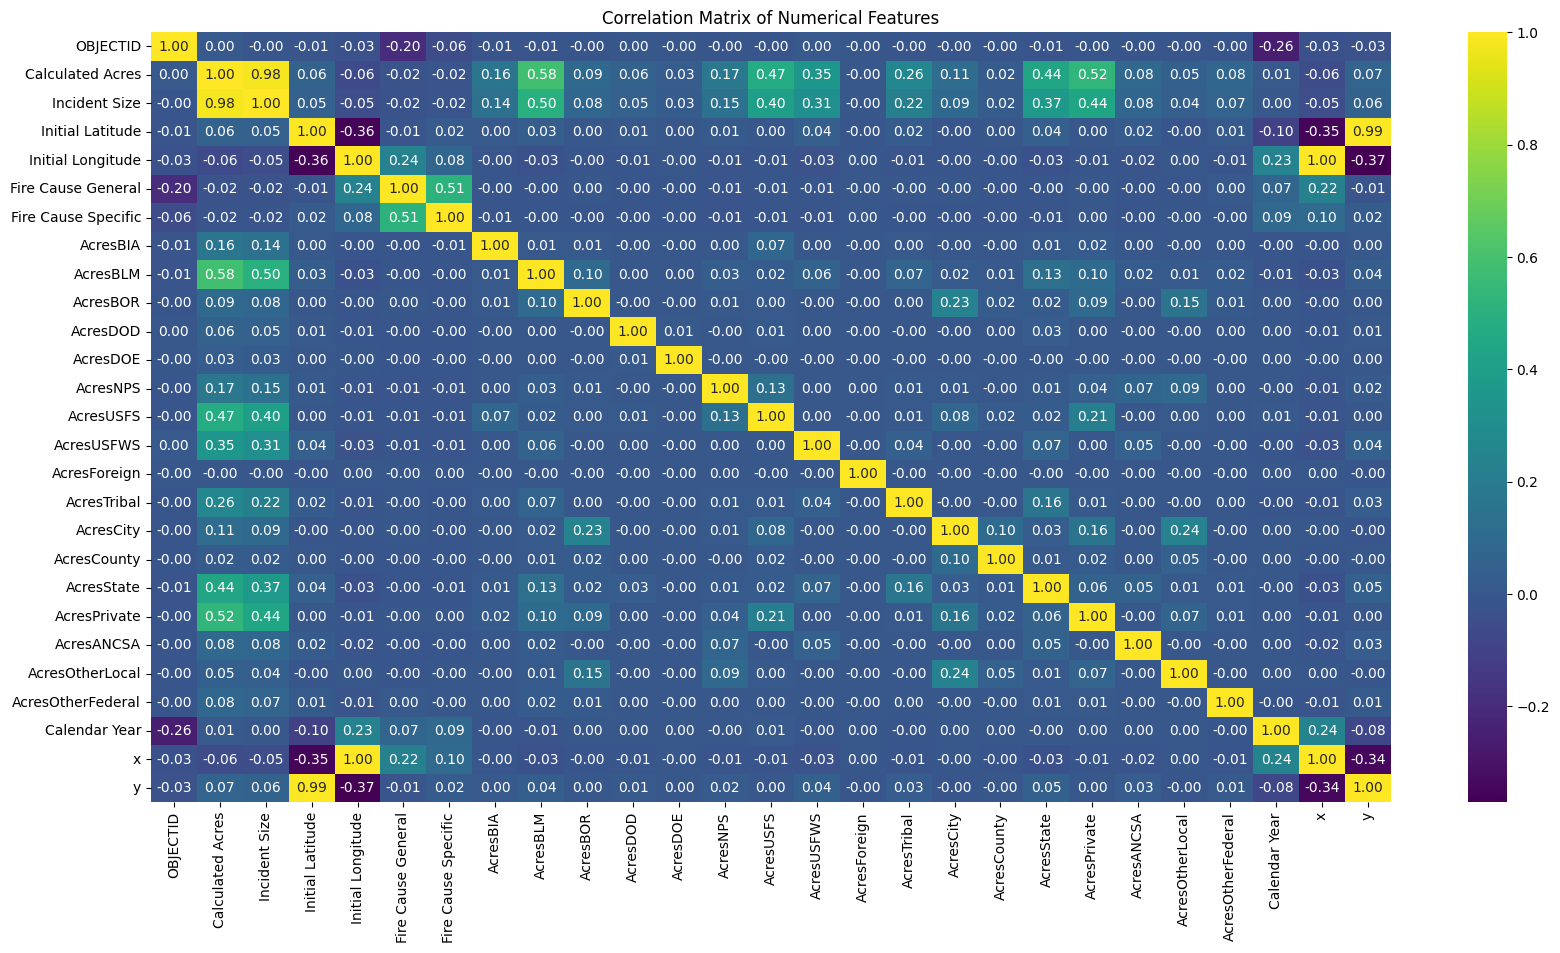

In [8]:
numerical_df = inform.select_dtypes(include='number')

# correlation matrix
correlation_matrix = numerical_df.corr()

# generating the heatmap
plt.figure(figsize=(20, 10))  # first number widens plot, second number heightens
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f") # 2 decimals
plt.title('Correlation Matrix of Numerical Features')
plt.show()




#### 2. Here, the bar plot shows how the wildfire Incident Size varies across different Predominant Fuel Groups and is being categorized by the Incident Type (i.e., Wildfire vs. Prescribed Fire). It is created using Seaborn with the hue parameter to compare both categories.

#### The key observations here showcase that Grass-Shrub vegetation has the largest Incident Sizes, predominantly in Prescribed Fires. Grass also contributes significantly to incident sizes for Prescribed Fires, while its contribution to Wildfires is minimal.

#### Other fuel groups like Brush and Timber are the major contributors to wildfire. Nonburnable fuels exhibit incident sizes only for Prescribed Fires, which aligns with planned and controlled fire practices. This analysis highlights how different fuel types and incident categories influence wildfire sizes. It emphasizes the importance of understanding fuel type distribution to predict wildfire behavior effectively.

#### The RX is acronym for Prescribed fire and WF is acronym for Wildfire


In [9]:
df_fuel=inform[['Predominant Fuel Group', 'Incident Size', 'Incident Type Category']]

In [10]:
df_fuel['Predominant Fuel Group']=df_fuel['Predominant Fuel Group'].fillna("unknown")

<ipython-input-10-fd8cbbdae85d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fuel['Predominant Fuel Group']=df_fuel['Predominant Fuel Group'].fillna("unknown")


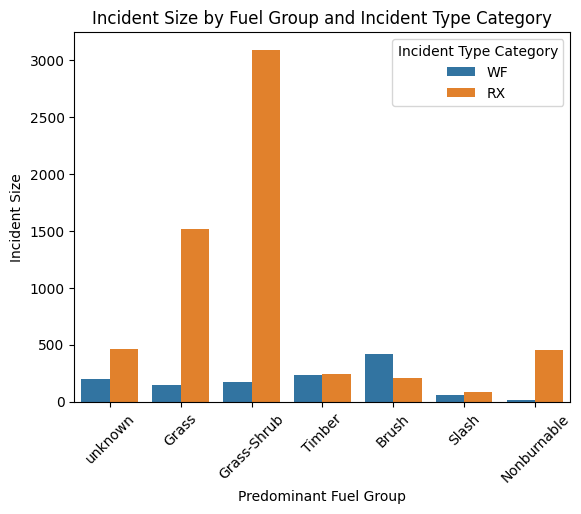

In [11]:
sns.barplot(data=df_fuel, x='Predominant Fuel Group', y='Incident Size', hue='Incident Type Category',errorbar=None)

plt.xticks(rotation=45)
plt.ylabel("Incident Size")
plt.xlabel("Predominant Fuel Group")
plt.title("Incident Size by Fuel Group and Incident Type Category")
plt.legend(title='Incident Type Category')

plt.show()


# Exploratory Data Analysis on Categorical Values
## Step 1: Converting date strings into date-time.

In [13]:
inform['Containment Date Time'] = pd.to_datetime(inform['Containment Date Time'])

<ipython-input-13-2a400c0cc49b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inform['Containment Date Time'] = pd.to_datetime(inform['Containment Date Time'])


In [14]:
inform['Control Date Time'] = pd.to_datetime(inform['Control Date Time'])

<ipython-input-14-04d231e43c3f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inform['Control Date Time'] = pd.to_datetime(inform['Control Date Time'])


In [15]:
inform['Fire Discovery Date Time'] = pd.to_datetime(inform['Fire Discovery Date Time'])

<ipython-input-15-951d52cbe5b3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inform['Fire Discovery Date Time'] = pd.to_datetime(inform['Fire Discovery Date Time'])


In [16]:
inform['Initial Response Date Time'] = pd.to_datetime(inform['Initial Response Date Time'])


<ipython-input-16-fb012fe6f9d8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inform['Initial Response Date Time'] = pd.to_datetime(inform['Initial Response Date Time'])


If given POODispatchCenter is NaN, it will assign it to nearest Dispatch Center that helped with handling the fire.


In [12]:
inform['POODispatchCenterID'] = inform.apply(
    lambda row: row['Dispatch Center ID'] if pd.isna(row['POODispatchCenterID']) else row['POODispatchCenterID'],
    axis = 1
)

Converting WF and RX acronyms into Wildfire and Prescribed Fire for better readability.

In [17]:
inform['Incident Type Category'] = inform['Incident Type Category'].replace({
    'WF': 'WildFire',
    'RX': 'Prescribed Fire'
    })
print(inform['Incident Type Category'].unique())

['WildFire' 'Prescribed Fire']


In [137]:
inform['POO Jurisdictional Agency'].unique()

array(['FS', 'BIA', 'SFS', 'BLM', 'Unknown', 'C&L', 'NPS', 'SF', 'DOF',
       'USFS', 'PRI', 'DNRC', 'CALFIRE', 'BOR', 'FWS', 'MEMES', 'IDTFD',
       'OES', 'CDF', 'DL', 'State', 'ANC', 'DVF', 'SDPRA',
       'NH Division of Forests and Lands', 'DNR', 'IDTWX', 'MNCPF', 'DOC',
       'Florida Forest Service', 'BIA-TURTLE MOUNTAIN AGENCY',
       'Yampa Fire Protection District', 'DFL', 'HQ', 'MIDNR', 'DFFM',
       'IDIFD', 'DWF', 'FC', 'DFF', 'MN-PRI', 'DFR', 'FPA', 'ANCSA',
       'DOD', 'CLARK COUNTY', 'TMFPD', 'USACE', 'WYCAD', 'IDEIS',
       'Private', 'Fishlake National Forest', 'GFC', 'SP', 'CAL FIRE',
       'USN', 'City', 'FFC', 'USA', 'DPOR', 'OthLoc', 'USFWS', 'County',
       'DTPF', 'Tribal', 'INTER', 'TRIBE', 'OthFed', 'DOE',
       'Forest Service', 'Fish & Wildlife Service',
       'National Park Service', 'BIA-Turtle Mountain Agency', 'USAF',
       'FFS', 'DEMA', 'CSFS'], dtype=object)

In [18]:
inform['POO Jurisdictional Agency'] = inform['POO Jurisdictional Agency'].fillna("Unknown")

In [19]:
inform['POO Jurisdictional Agency'] = inform['POO Jurisdictional Agency'].replace('--', 'Unknown')

In [138]:
inform['POO Jurisdictional Unit'].unique()

array(['NDDPF', 'AZSCA', 'AZCOF', ..., 'CASKR', 'TXPBP', 'CATJR'],
      dtype=object)

In [139]:
inform['POO Jurisdictional Unit'].nunique()

1363

In [20]:
inform['POO Jurisdictional Unit'] = inform['POO Jurisdictional Unit'].fillna("Unknown")

In [141]:
inform['POO Landowner Category'].unique()

array(['USFS', 'BIA', 'Private', 'BLM', 'USFWS', 'DOE', 'NPS', 'State',
       'Tribal', 'City', 'BOR', 'County', 'ANCSA', 'DOD', 'Foreign',
       'Unknown', 'OthLoc', 'OthFed'], dtype=object)

In [21]:
inform['POO Landowner Category'] = inform['POO Landowner Category'].fillna("Unknown")

In [22]:
inform['POO Landowner Category'] = inform['POO Landowner Category'].replace('#', 'Unknown')

In [142]:
inform['POO Landowner Kind'].unique()

array(['Federal', 'Private', 'Other', 'Unknown'], dtype=object)

In [23]:
inform['POO Landowner Kind'] = inform['POO Landowner Kind'].replace('#', 'Unknown')

In [24]:
inform['POO Landowner Kind'] = inform['POO Landowner Kind'].fillna('Unknown')

In [143]:
inform['POO Protecting Agency'].unique()

array(['FS', 'BIA', 'SFS', 'BLM', 'DNR', 'C&L', 'SF', 'Unknown', 'NPS',
       'DOF', 'DFF', 'USFS', 'DNRC', 'MEMES', 'DVF', 'OES', 'FWS', 'DWF',
       'CDF', 'DL', 'IDTFD', 'BOR', 'BIA-TURTLE MOUNTAIN AGENCY',
       'Lisbon Fire Department', 'IDTWX', 'FC', 'FFS', 'CARRU',
       'Weare Fire Department', 'DFL', 'DFFM', 'County', 'USA',
       'BIA-Turtle Mountain Agency', 'KDF', 'SP', 'CAL FIRE', 'PRI',
       'FFC', 'Tribal', 'DFR', 'INTER', 'ANCSA', 'State', 'USFWS',
       'OthLoc', 'DOD', 'City', 'OthFed', 'DOE', 'DNRF', 'TRIBE', 'DOC',
       'USN', 'USAF', 'AZ', 'CA', 'MEX', 'MT', 'Private', 'WY', 'CO',
       'AFS', 'IDL', 'NDF', 'NV', 'UT', 'OTHR', 'OR', 'WA', 'KY', 'FL',
       'FDF', 'FEMA', 'ARM', 'NC', 'ND', 'VA', 'IL', 'NM', 'OK', 'ID',
       'NAV', 'MI', '2', 'NMF', 'AFC', 'WID', 'KS', 'USGS', 'SCF', 'AL',
       'GA', 'GFC', 'TN', 'LA', 'MS', 'AR', 'VAD', 'SC', 'TFS', 'MO',
       'MDC', 'IN', 'WI', 'PA', 'VT', 'DC', 'FM', 'SD', 'CSF', 'PR', 'TX',
       'KSF', 'TDF',

In [25]:
inform['POO Protecting Agency'] = inform['POO Protecting Agency'].replace(['1', '3'], 'Unknown')

In [26]:
inform['POO Protecting Agency'] = inform['POO Protecting Agency'].fillna('Unknown')

There is some data about other countries like Mexico and Canada, but we are keep our work limited to fire in USA only

In [144]:
inform['POO State'].unique()

array(['US-ND', 'US-AZ', 'US-WA', 'US-MT', 'US-ME', 'US-OK', 'US-MN',
       'US-UT', 'US-NV', 'US-ID', 'US-OR', 'US-WY', 'US-MS', 'US-CA',
       'US-CO', 'US-NM', 'US-SD', 'US-LA', 'US-VA', 'US-FL', 'US-OH',
       'US-MO', 'US-PA', 'US-MD', 'US-IL', 'US-MI', 'US-AR', 'US-KY',
       'US-WI', 'US-GA', 'US-DC', 'US-AL', 'US-NE', 'US-NH', 'US-WV',
       'US-SC', 'US-TX', 'US-NC', 'US-AK', 'US-NY', 'US-IA', 'US-TN',
       'US-IN', 'US-NJ', 'US-VT', 'US-KS', 'US-MA', 'US-HI', 'US-GU', nan,
       'US-CT', 'US-DE', 'US-PR', 'US-RI'], dtype=object)

In [39]:
other_countries = ['CA-ON', 'MX-SO', 'MX-BN', 'MX-CA', 'MX-CH']
inform = inform[~inform['POO State'].isin(other_countries)]

# Exploratory Data Analysis Findings:

1. IRWIN ID provided no use to us and did not correlate with the rest of the variables in our set, so we were able to drop that column.
2. Dispatch Center ID: We can remove this feature since we already have the POODispatch Center ID, and only 2% of its values are missing.
3. Fire Code: We are unsure of its relevance at this point, so it can be dropped until further analysis clarifies its potential use.
4. Incident Size vs. Calculated Acres: It would be worth exploring the correlation between these two features. If they are highly correlated, we might consider dropping one.
5. Protecting Unit vs. Protecting Agency: Analyzing the correlation between these features could reveal redundancy. Based on the results, we can decide whether to drop one of them.
5. Fire Cause (General and Specific): These features should be reviewed for correlation. If they show high redundancy, we might drop one.
7. Predominant Fuel Group: Further thought is needed on whether this feature adds value to the analysis.
8. Control DateTime: This column requires correction, as it needs to accurately reflect ongoing fires. We should validate whether the current timestamps are correct and consistent.

Let's proceed with implementing these changes step by step.


### Proving that incident size and Calculated Acres have high correlation (Point 4)

In [40]:
size_of_fire = inform[['Incident Size', 'Calculated Acres']]

In [41]:
correlation = size_of_fire['Incident Size'].corr(size_of_fire['Calculated Acres'])
correlation

0.9790593876550181

<Axes: >

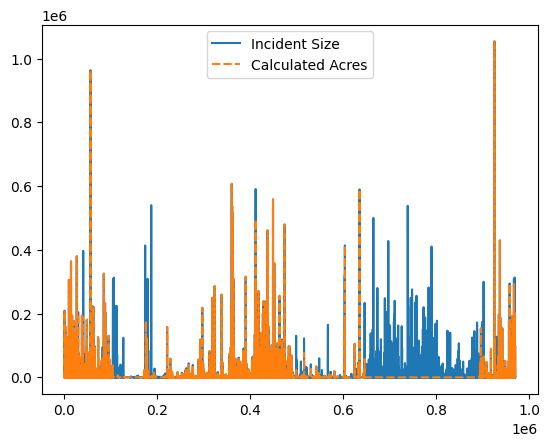

In [42]:
sns.lineplot(data=size_of_fire)

#### From the correlation matrix and the visualizations above, we can see that there is a significant correlation between Incident Size and Calculated Acres, thus we can drop calculated acres as it has  60% of NaN values.

### According to metadata of the INFORM dataset, Protecting Agency is responsible for handling the fire. While Protecting Unit is a unit within that agency that will be assigned that task.  

#### The above analysis helped us to conclude that POO Protecting Unit is a subset of POO Protecting Agency. (Point 5)

In [43]:
protecting_units = inform[['POO Protecting Unit', 'POO Protecting Agency']]


In [44]:
protecting_units['POO Protecting Agency'].nunique()


154

In [45]:
protecting_units['POO Protecting Unit'].nunique()

2350

In [46]:
fire_cause = inform[['Fire Cause General', 'Fire Cause Specific']]

In [36]:
fire_cause['Fire Cause General'].unique()

array([13.,  2.,  3., nan,  7.,  1.,  9.,  5.,  6.,  4., 10., 12.,  8.,
       11.])

In [37]:
fire_cause['Fire Cause Specific'].unique()

array([nan,  7.,  1., 60., 47., 19., 40., 44., 15., 62.,  4.,  3., 14.,
       45., 25., 22., 18., 73., 77., 30., 65., 64., 23., 54., 28., 68.,
       46., 10., 13., 16., 55., 31., 39., 35., 38., 76., 53., 34.,  6.,
       50., 57., 17., 41., 42., 59., 51., 24., 27., 29.,  8., 21., 43.,
       11., 26., 67., 37., 58.,  5., 74., 36., 20., 61., 70., 72., 32.,
       48., 63., 33., 12.,  2.,  9., 66., 71., 49., 56., 75.])

### The column Fire Cause General provides a broad classification of the fire's cause, such as Human, Natural, Equipment etc. The column Fire Cause Specific offers a detailed explanation within each general category, specifying the exact cause, like Arson, Smoking, Lightning etc. Since this helps us identify the exact causes of wildfires, we prioritized it. Additionally, because Fire Cause General contains over 60% missing (NaN) values, we have dropped this column.

In [51]:
cause_mapping = {
    1: 'Natural',
    2: 'Equipment/vehicles',
    3: 'Smoking',
    4: 'Recreation/cultural activities',
    5: 'Debris/open burning',
    6: 'Railroad',
    7: 'Incendiary (unlawful)',
    8: 'Fire Play (minor)',
    9: 'Miscellaneous/other',
    10: 'Fireworks',
    11: 'Power generation/transmission',
    12: 'Structure'
}


def map_fire_cause(code):
    if pd.isna(code):
        return 'Unknown'
    return cause_mapping.get(int(code), 'Unknown')



inform['Fire Cause General'] = inform['Fire Cause General'].apply(map_fire_cause)


<Axes: ylabel='Predominant Fuel Group'>

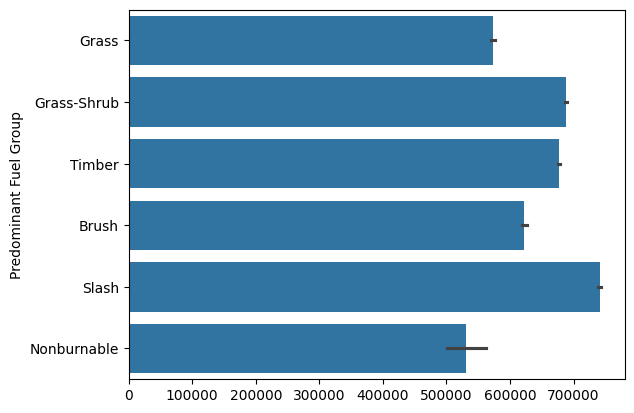

In [47]:
inform['Predominant Fuel Group'].unique()
sns.barplot(inform['Predominant Fuel Group'])

### Calculating the correlation between Predominant Fuel Group and Incident Size

In [48]:
inform['Predominant Fuel Group'] = inform['Predominant Fuel Group'].fillna('Unknown')


In [49]:
area_burned = inform[['Predominant Fuel Group', 'Incident Size']]
area_burned['Predominant Fuel Group'] = area_burned['Predominant Fuel Group'].fillna('Unknown')
area_burned = area_burned.dropna()

fuel_group = area_burned['Predominant Fuel Group'].unique()

grouped_data = [area_burned[area_burned['Predominant Fuel Group'] == group]['Incident Size'] for group in fuel_group]

<ipython-input-49-55d3581979f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_burned['Predominant Fuel Group'] = area_burned['Predominant Fuel Group'].fillna('Unknown')


In [50]:
if all(len(group) > 0 for group in grouped_data):
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print("ANOVA F-statistic:", f_stat)
    print("p-value:", p_value)
else:
    print("Some groups are empty; please verify the dataset.")

ANOVA F-statistic: 13.725289578377591
p-value: 1.1684601296612006e-15


### A p value > 0.50 shows that these two columns ie Predominant Fuel Group and Incident Size is highly correlated

#### Since, Predominant Fuel Group have good correlations with lot of fields, we will be dropping all the columns where it is NAN. Because it will important feature of our model

In [52]:
inform = inform.dropna(subset=['Predominant Fuel Group'])


## Weather Data Integration

To analyze further, we required historical weather data corresponding to the fire observation dates to explore potential correlations between Incident Size and meteorological conditions on the same day. For doing this, we utilized the Open Meteo API, and to avoid exceeding the daily API limit, we divided the dataset rows among the four of us. Below is a code sample demonstrating how we fetched the data, using five instances from the InForms dataset for illustration purposes.


In [53]:

fire_data = inform.iloc[:5]  # Limit to the first 5 rows for example

#API endpoint
url = "https://archive-api.open-meteo.com/v1/archive"
all_aggregated_data = []

# Maximum number of requests per minute (this has been adjusted based on API rate limits as per the official website)
requests_per_minute = 100
seconds_per_request = 60 / requests_per_minute

for index, row in fire_data.iterrows():
    fire_date = row["Fire Discovery Date Time"]
    latitude = row["Initial Latitude"]
    longitude = row["Initial Longitude"]

    print(f"Processing fire with date: {fire_date}")

    # fire_date is in 'YYYY-MM-DD HH:MM:SS' format, split to get the date part (e.g., "2020-06-02")
    start_date = fire_date.strftime("%Y-%m-%d")  # Extract date as 'YYYY-MM-DD'
    print(f"Extracted start date: {start_date}")

    # Convert the start_date to datetime object using the format '%Y-%m-%d'
    try:
        start_datetime = datetime.strptime(start_date, "%Y-%m-%d")
    except ValueError as e:
        print(f"Error parsing start date {start_date} for fire {fire_date}: {e}")
        continue  # Skip iteration incase of a parsing error

    end_datetime = start_datetime + timedelta(days=1)  # Add one day to get the end date
    end_date = end_datetime.strftime("%Y-%m-%d")

    # Print the dates for verification
    print(f"Start date: {start_date}, End date: {end_date}")

    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "hourly": "relative_humidity_2m,pressure_msl,surface_pressure,soil_temperature_0_to_7cm,soil_moisture_0_to_7cm",
        "daily": "temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max",
        "timezone": "GMT"
    }

    try:
        response = requests.get(url, params=params)
        data = response.json()

        aggregated_data = {"fire_date": fire_date, "latitude": latitude, "longitude": longitude}

        daily_data = data.get("daily", {})
        for key, values in daily_data.items():
            if key != "time":
                aggregated_data[f"avg_{key}"] = np.mean(values)

        hourly_data = data.get("hourly", {})
        for key, values in hourly_data.items():
            if key != "time":
                aggregated_data[f"avg_{key}"] = np.mean(values)

        all_aggregated_data.append(aggregated_data)

    except Exception as e:
        print(f"Error fetching data for fire at {latitude}, {longitude} on {fire_date}: {e}")

    time.sleep(seconds_per_request)  # Adjusting sleep time to match API rate limits

df = pd.DataFrame(all_aggregated_data)
df.head()


Processing fire with date: 2021-06-28 14:58:00
Extracted start date: 2021-06-28
Start date: 2021-06-28, End date: 2021-06-29
Processing fire with date: 2020-04-03 16:15:41
Extracted start date: 2020-04-03
Start date: 2020-04-03, End date: 2020-04-04
Processing fire with date: 2020-11-03 20:35:00
Extracted start date: 2020-11-03
Start date: 2020-11-03, End date: 2020-11-04
Processing fire with date: 2021-04-18 16:58:00
Extracted start date: 2021-04-18
Start date: 2021-04-18, End date: 2021-04-19
Processing fire with date: 2020-07-04 03:00:00
Extracted start date: 2020-07-04
Start date: 2020-07-04, End date: 2020-07-05


,fire_date,latitude,longitude,avg_temperature_2m_max,avg_temperature_2m_min,avg_temperature_2m_mean,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm
0,2021-06-28 14:58:00,39.24440,-108.93780,31.1,17.65,24.40,0.00,0.000,32.05,52.95,26.875000,1014.152083,863.404167,30.570833,0.018500
1,2020-04-03 16:15:41,37.95521,-105.68530,10.7,-3.30,2.15,0.85,0.595,18.70,39.45,57.458333,1012.391667,759.050000,3.168750,0.121500
2,2020-11-03 20:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-18 16:58:00,47.08020,-114.43870,18.5,0.90,8.00,3.75,2.380,12.50,50.20,57.250000,1023.137500,913.775000,6.506250,0.291521
4,2020-07-04 03:00:00,35.53772,-98.93409,34.5,23.75,29.15,0.05,0.000,13.20,27.70,58.666667,1012.635417,958.477083,32.218750,0.153625


### This is final intergration of wildfire dataset and corresponding weather dataset. This integrations have been perfomed by various number of iterations. Each iterations fetched the weather data for corresponding Latitude, Longitude and date of fire discovery

We will be doing EDA on the integrated fire weather data

In [55]:
fireWeather_data = pd.read_csv('/content/drive/MyDrive/WildFirePrediction/fire_weather_data.csv')

<ipython-input-55-1f13b7221274>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  fireWeather_data = pd.read_csv('/content/drive/MyDrive/WildFirePrediction/fire_weather_data.csv')


In [56]:
fireWeather_data.isna().sum()

,0
Unnamed: 0,0
OBJECTID,0
Calculated Acres,944
Containment Date Time,1042
Control Date Time,1325
Incident Size,4
Dispatch Center ID,0
FireCode,2205
Fire Discovery Date Time,0
FireOutDateTime,344


In [57]:
fireWeather_data.drop(columns=['Unnamed: 0'], inplace=True)

In [58]:
# Drop duplicate rows based on the 'ObjectID' column
fireWeather_data = fireWeather_data.drop_duplicates(subset=['OBJECTID'], keep='first')


In [122]:
# Creating a new column Response Time, giving the difference between the Initial Fire Discovery and Initial Response
fireWeather_data['Fire Discovery Date Time'] = pd.to_datetime(fireWeather_data['Fire Discovery Date Time'], errors='coerce')
fireWeather_data['Initial Response Date Time'] = pd.to_datetime(fireWeather_data['Initial Response Date Time'], errors='coerce')
fireWeather_data['Response Time'] = (fireWeather_data['Initial Response Date Time'] - fireWeather_data['Fire Discovery Date Time']).dt.total_seconds() / 3600  # In hours


In [60]:
fireWeather_data['Response Time'].mean()

3.553093266350066

In [123]:
# replacing NAN with Mean response time
fireWeather_data['Response Time'].fillna(fireWeather_data['Response Time'].mean(), inplace=True)

<ipython-input-123-f7aed5932c82>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fireWeather_data['Response Time'].fillna(fireWeather_data['Response Time'].mean(), inplace=True)


In [62]:
# according to early finding dropping these column
columns_to_drop =['Calculated Acres','FireCode','Fire Cause Specific']

In [63]:
fireWeather_data.drop(columns=columns_to_drop, inplace=True)

In [124]:
# creating a new column fire duration ie the number of hours a given fire lasted from the time it was discovered to time when it put out
fireWeather_data['Fire Discovery Date Time'] = pd.to_datetime(fireWeather_data['Fire Discovery Date Time'])
fireWeather_data['FireOutDateTime'] = pd.to_datetime(fireWeather_data['FireOutDateTime'])
fireWeather_data['fire_duration_hours'] = (fireWeather_data['FireOutDateTime'] - fireWeather_data['Fire Discovery Date Time']).dt.total_seconds() / 3600


In [66]:
pd.options.display.max_columns=100

In [125]:
fireWeather_data.head()

,OBJECTID,Containment Date Time,Control Date Time,Incident Size,Dispatch Center ID,Fire Discovery Date Time,FireOutDateTime,GACC,Incident Type Category,Incident Type Kind,Initial Latitude,Initial Longitude,Initial Response Date Time,Local Incident Identifier,POO County,POODispatchCenterID,POO Jurisdictional Agency,POO Jurisdictional Unit,POO Landowner Category,POO Landowner Kind,POO Protecting Agency,POO Protecting Unit,POO State,Predominant Fuel Group,UniqueFireIdentifier,FORID,Fire Cause General,GlobalID,Related Irwin IDs,AcresBIA,AcresBLM,AcresBOR,AcresDOD,AcresDOE,AcresNPS,AcresUSFS,AcresUSFWS,AcresForeign,AcresTribal,AcresCity,AcresCounty,AcresState,AcresPrivate,AcresANCSA,AcresOtherLocal,AcresOtherFederal,Calendar Year,x,y,fire_date,latitude,longitude,avg_temperature_2m_max,avg_temperature_2m_min,avg_temperature_2m_mean,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,Response Time,fire_duration_hours
0,3036631,NaN,NaN,0.25,NDNDC,2020-02-11 16:13:17,2020-02-11 17:00:00,NRCC,WildFire,FI,48.11125,-102.826444,2020-02-11 16:17:00,200005,McKenzie,NDNDC,FS,NDDPF,USFS,Federal,FS,NDDPF,US-ND,Grass,2020-NDDPF-200005,e2f36994-f4a2-4477-9408-f03d435b4f99,7.0,b3bbca83-f5db-437b-82c8-eb913ae6ba55,{7FB0524A-A9D6-440F-998C-0004622C2517},0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.144659e+07,6.125384e+06,2020-02-11 16:13:17,48.11125,-102.826444,1.15,-13.80,-7.4,1.15,0.805,30.00,52.05,67.062500,1019.931250,942.775000,-3.666667,0.371271,0.061944,0.778611
1,3036637,2020-10-14 05:54:00,2020-10-15 18:19:00,1.00,AZPHC,2020-10-14 05:01:00,2020-10-15 18:19:00,SWCC,WildFire,FI,33.35797,-110.459900,2020-10-14 05:38:00,2997,Gila,AZPHC,BIA,AZSCA,BIA,Federal,BIA,AZSCA,US-AZ,Grass-Shrub,2020-AZSCA-002997,050b227d-6f56-4c8c-99b2-8d3fceae8a1a,13.0,2723cb2f-cb7e-42a1-bfdf-7fb3a9d8eec1,{25F29B4D-D6D3-42D7-9E50-00094F9DD0A7},0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.229634e+07,3.942916e+06,2020-10-14 05:01:00,33.35797,-110.459900,35.95,14.95,25.4,0.00,0.000,15.80,36.90,14.916667,1014.202083,924.197917,27.416667,0.235000,0.616667,37.300000
2,3036639,2020-08-10 14:20:00,2020-08-10 14:40:00,0.10,AZFDC,2020-08-10 13:35:44,2020-08-20 15:00:00,SWCC,WildFire,FI,35.42485,-111.568400,2020-08-10 13:58:00,1342,Coconino,AZFDC,FS,AZCOF,USFS,Federal,FS,AZCOF,US-AZ,Grass-Shrub,2020-AZCOF-001342,bf70a16d-5086-4dd7-a4d1-b94540b68f53,13.0,4bbe1e8e-f679-4b27-a04f-72b59b5712b9,{9760E67C-E46C-4A56-A57F-000BFF833258},0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.241992e+07,4.221496e+06,2020-08-10 13:35:44,35.42485,-111.568400,31.50,17.45,25.2,0.05,0.000,27.25,52.55,15.979167,1014.312500,810.679167,30.250000,0.078000,0.371111,241.404444
3,3036644,2020-08-21 00:43:00,2020-08-21 17:05:00,0.10,ORBMC,2020-08-20 17:01:41,2020-08-21 21:50:00,NWCC,WildFire,FI,46.25674,-117.467500,2020-08-20 20:00:00,921,Asotin,ORBMC,FS,ORUMF,USFS,Federal,FS,ORUMF,US-WA,Grass-Shrub,2020-ORUMF-000921,a9f3caf4-77f6-4eb8-ab00-13995620ce91,1.0,3f271b7a-ee75-4b06-99d2-e580d925f15d,{314B47A1-9C7E-4B70-841F-000F52B578A0},0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.306909e+07,5.821695e+06,2020-08-20 17:01:41,46.25674,-117.467500,25.25,15.10,19.9,0.05,0.000,18.60,53.10,35.770833,1010.808333,865.397917,20.452083,0.141250,2.971944,28.805278
4,3036645,2020-08-06 23:20:00,2020-08-07 22:31:00,0.25,MTMDC,2020-08-06 14:11:58,2020-08-09 22:27:00,NRCC,WildFire,FI,46.70312,-113.682500,2020-08-06 15:09:00,1670,Missoula,MTMDC,FS,MTLNF,USFS,Federal,FS,MTLNF,US-MT,Timber,2020-MTLNF-001670,d48f6dea-18c1-42af-afbf-21da9b8f39fb,1.0,3b1fc253-917a-407f-95fb-bfac91fa54e8,{96BDD15F-FD9A-4B31-B92D-00115A65C7F6},0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.265490e+07,5.893501e+06,2020-08-06 14:11:58,46.70312,-

In [69]:
fire_weather_data = fireWeather_data.copy()
fire_weather_data.head()

,OBJECTID,Containment Date Time,Control Date Time,Incident Size,Dispatch Center ID,Fire Discovery Date Time,FireOutDateTime,GACC,Incident Type Category,Incident Type Kind,Initial Latitude,Initial Longitude,Initial Response Date Time,Local Incident Identifier,POO County,POODispatchCenterID,POO Jurisdictional Agency,POO Jurisdictional Unit,POO Landowner Category,POO Landowner Kind,POO Protecting Agency,POO Protecting Unit,POO State,Predominant Fuel Group,UniqueFireIdentifier,FORID,Fire Cause General,GlobalID,Related Irwin IDs,AcresBIA,AcresBLM,AcresBOR,AcresDOD,AcresDOE,AcresNPS,AcresUSFS,AcresUSFWS,AcresForeign,AcresTribal,AcresCity,AcresCounty,AcresState,AcresPrivate,AcresANCSA,AcresOtherLocal,AcresOtherFederal,Calendar Year,x,y,fire_date,latitude,longitude,avg_temperature_2m_max,avg_temperature_2m_min,avg_temperature_2m_mean,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,Response Time,fire_duration_hours
0,3036631,NaN,NaN,0.25,NDNDC,2020-02-11 16:13:17,2020-02-11 17:00:00,NRCC,WildFire,FI,48.11125,-102.826444,2020-02-11 16:17:00,200005,McKenzie,NDNDC,FS,NDDPF,USFS,Federal,FS,NDDPF,US-ND,Grass,2020-NDDPF-200005,e2f36994-f4a2-4477-9408-f03d435b4f99,7.0,b3bbca83-f5db-437b-82c8-eb913ae6ba55,{7FB0524A-A9D6-440F-998C-0004622C2517},0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.144659e+07,6.125384e+06,2020-02-11 16:13:17,48.11125,-102.826444,1.15,-13.80,-7.4,1.15,0.805,30.00,52.05,67.062500,1019.931250,942.775000,-3.666667,0.371271,0.061944,0.778611
1,3036637,2020-10-14 05:54:00,2020-10-15 18:19:00,1.00,AZPHC,2020-10-14 05:01:00,2020-10-15 18:19:00,SWCC,WildFire,FI,33.35797,-110.459900,2020-10-14 05:38:00,2997,Gila,AZPHC,BIA,AZSCA,BIA,Federal,BIA,AZSCA,US-AZ,Grass-Shrub,2020-AZSCA-002997,050b227d-6f56-4c8c-99b2-8d3fceae8a1a,13.0,2723cb2f-cb7e-42a1-bfdf-7fb3a9d8eec1,{25F29B4D-D6D3-42D7-9E50-00094F9DD0A7},0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.229634e+07,3.942916e+06,2020-10-14 05:01:00,33.35797,-110.459900,35.95,14.95,25.4,0.00,0.000,15.80,36.90,14.916667,1014.202083,924.197917,27.416667,0.235000,0.616667,37.300000
2,3036639,2020-08-10 14:20:00,2020-08-10 14:40:00,0.10,AZFDC,2020-08-10 13:35:44,2020-08-20 15:00:00,SWCC,WildFire,FI,35.42485,-111.568400,2020-08-10 13:58:00,1342,Coconino,AZFDC,FS,AZCOF,USFS,Federal,FS,AZCOF,US-AZ,Grass-Shrub,2020-AZCOF-001342,bf70a16d-5086-4dd7-a4d1-b94540b68f53,13.0,4bbe1e8e-f679-4b27-a04f-72b59b5712b9,{9760E67C-E46C-4A56-A57F-000BFF833258},0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.241992e+07,4.221496e+06,2020-08-10 13:35:44,35.42485,-111.568400,31.50,17.45,25.2,0.05,0.000,27.25,52.55,15.979167,1014.312500,810.679167,30.250000,0.078000,0.371111,241.404444
3,3036644,2020-08-21 00:43:00,2020-08-21 17:05:00,0.10,ORBMC,2020-08-20 17:01:41,2020-08-21 21:50:00,NWCC,WildFire,FI,46.25674,-117.467500,2020-08-20 20:00:00,921,Asotin,ORBMC,FS,ORUMF,USFS,Federal,FS,ORUMF,US-WA,Grass-Shrub,2020-ORUMF-000921,a9f3caf4-77f6-4eb8-ab00-13995620ce91,1.0,3f271b7a-ee75-4b06-99d2-e580d925f15d,{314B47A1-9C7E-4B70-841F-000F52B578A0},0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.306909e+07,5.821695e+06,2020-08-20 17:01:41,46.25674,-117.467500,25.25,15.10,19.9,0.05,0.000,18.60,53.10,35.770833,1010.808333,865.397917,20.452083,0.141250,2.971944,28.805278
4,3036645,2020-08-06 23:20:00,2020-08-07 22:31:00,0.25,MTMDC,2020-08-06 14:11:58,2020-08-09 22:27:00,NRCC,WildFire,FI,46.70312,-113.682500,2020-08-06 15:09:00,1670,Missoula,MTMDC,FS,MTLNF,USFS,Federal,FS,MTLNF,US-MT,Timber,2020-MTLNF-001670,d48f6dea-18c1-42af-afbf-21da9b8f39fb,1.0,3b1fc253-917a-407f-95fb-bfac91fa54e8,{96BDD15F-FD9A-4B31-B92D-00115A65C7F6},0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,-1.265490e+07,5.893501e+06,2020-08-06 14:11:58,46.70312,-

In [70]:
fire_weather_data['fire_duration_hours'].describe()

,fire_duration_hours
count,9788.000000
mean,256.363100
std,678.212942
min,-2.000000
25%,19.166667
50%,69.355694
75%,221.537500
max,19338.946389


In [71]:
cause_mapping = {
    1: 'Natural',
    2: 'Equipment/vehicles',
    3: 'Smoking',
    4: 'Recreation/cultural activities',
    5: 'Debris/open burning',
    6: 'Railroad',
    7: 'Incendiary (unlawful)',
    8: 'Fire Play (minor)',
    9: 'Miscellaneous/other',
    10: 'Fireworks',
    11: 'Power generation/transmission',
    12: 'Structure'
}

# Function to map NASF Cause Code to Proposed Fire Cause Standard
def map_fire_cause(code):
    if pd.isna(code):  # Check for NaN (missing values)
        return 'Unknown'
    return cause_mapping.get(int(code), 'Unknown')  # Map code to description or 'Unknown' for unmatched codes

# Apply the mapping function to the 'Fire Cause General' column
fire_weather_data['Fire Cause General'] = fire_weather_data['Fire Cause General'].apply(map_fire_cause)

In [72]:
columns = [
    'Incident Size',
    'Incident Type Category',
    'Predominant Fuel Group',
    'Fire Cause General',
    'avg_temperature_2m_max',
    'avg_precipitation_sum',
    'avg_snowfall_sum',
    'avg_wind_speed_10m_max',
    'avg_wind_gusts_10m_max',
    'avg_relative_humidity_2m',
    'avg_pressure_msl',
    'avg_surface_pressure',
    'avg_soil_temperature_0_to_7cm',
    'avg_soil_moisture_0_to_7cm',
    'fire_duration_hours',
    'Response Time'
]


In [74]:
model_data = fire_weather_data[columns]

In [75]:
model_data.isna().sum()

,0
Incident Size,4
Incident Type Category,0
Predominant Fuel Group,0
Fire Cause General,0
avg_temperature_2m_max,0
avg_precipitation_sum,0
avg_snowfall_sum,0
avg_wind_speed_10m_max,0
avg_wind_gusts_10m_max,0
avg_relative_humidity_2m,0


In [126]:
def handle_outliers_in_columns(df, columns):

    for column_name in columns:

        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        InterQuartileRange = Q3 - Q1


        lower_bound = Q1 - 1.5 * InterQuartileRange
        upper_bound = Q3 + 1.5 * InterQuartileRange


        median_value = df[column_name].median()


        df[column_name] = np.where(
            (df[column_name] < lower_bound) | (df[column_name] > upper_bound),
            median_value,
            df[column_name]
        )

    return df


In [77]:
columns_to_process=['fire_duration_hours','Response Time','Incident Size']

In [127]:
# handling outliers like -1 value of hours to make model robust
model_data = handle_outliers_in_columns(model_data, columns_to_process)
model_data.head()

,Incident Size,Incident Type Category,Predominant Fuel Group,Fire Cause General,avg_temperature_2m_max,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,fire_duration_hours,Response Time
0,-0.245787,WildFire,Grass,Incendiary (unlawful),-2.709703,0.106219,2.064496,1.752501,0.515586,1.177363,0.952841,0.727021,-2.298872,1.485580,-0.868552,-0.654973
1,-0.312606,WildFire,Grass-Shrub,Unknown,1.453147,-0.347656,-0.119369,-0.443785,-0.689890,-1.537074,-0.087388,0.497604,1.043494,0.355858,-0.548446,-0.227221
2,-0.446245,WildFire,Grass-Shrub,Unknown,0.920829,-0.327922,-0.119369,1.327164,0.555371,-1.481766,-0.067340,-0.904291,1.348160,-0.945715,1.240507,-0.416571
3,-0.446245,WildFire,Grass-Shrub,Natural,0.173190,-0.327922,-0.119369,-0.010714,0.599134,-0.451516,-0.703581,-0.228544,0.294598,-0.421355,-0.622901,1.588960
4,-0.245787,WildFire,Timber,Natural,0.346642,-0.189786,-0.119369,-0.451518,0.511608,0.513665,-0.915409,-0.294202,0.182812,-0.215826,-0.171989,0.030245


In [81]:
new_data=model_data.copy()


In [83]:
label_encoder_incident = LabelEncoder()
label_encoder_fuel = LabelEncoder()
label_encoder_cause = LabelEncoder()

new_data['Incident Type Category Encoded'] = label_encoder_incident.fit_transform(
    new_data['Incident Type Category']
)

new_data['Predominant Fuel Group Encoded'] = label_encoder_fuel.fit_transform(
    new_data['Predominant Fuel Group']
)

new_data['Fire Cause General Encoded'] = label_encoder_cause.fit_transform(
    new_data['Fire Cause General']
)



In [84]:
new_data.drop(columns=['Incident Type Category', 'Predominant Fuel Group','Fire Cause General'], inplace=True)

In [85]:
new_data.columns

Index(['Incident Size', 'avg_temperature_2m_max', 'avg_precipitation_sum',
       'avg_snowfall_sum', 'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max',
       'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure',
       'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm',
       'fire_duration_hours', 'Response Time',
       'Incident Type Category Encoded', 'Predominant Fuel Group Encoded',
       'Fire Cause General Encoded'],
      dtype='object')

Response related to 'Fire Cause Specific'

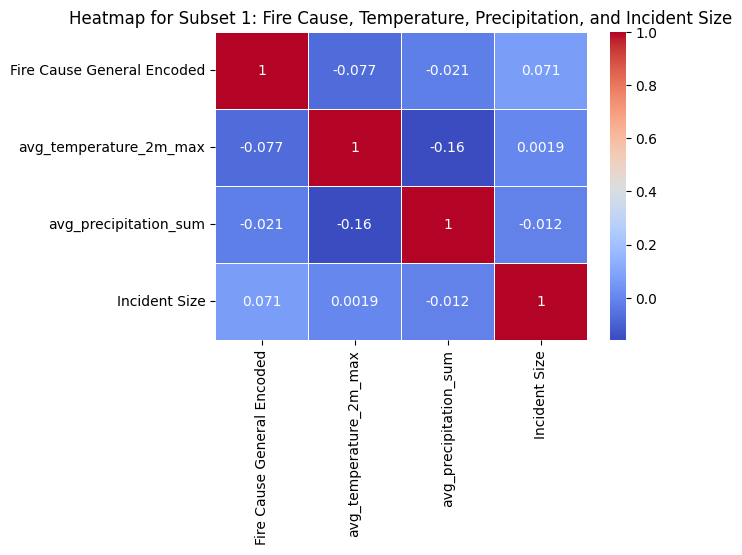

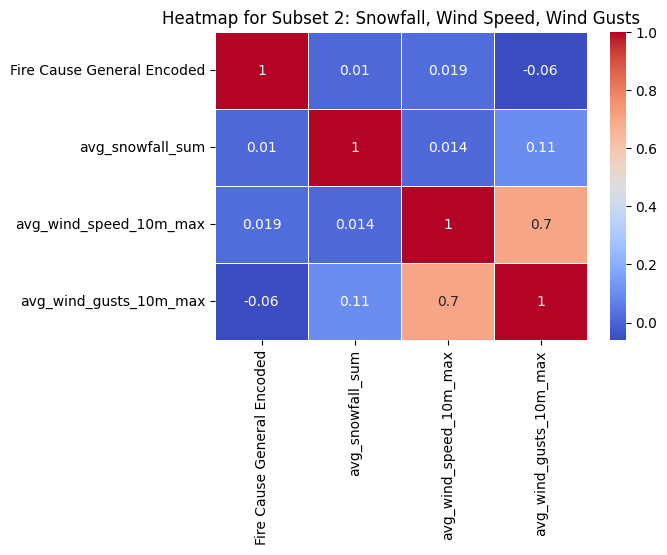

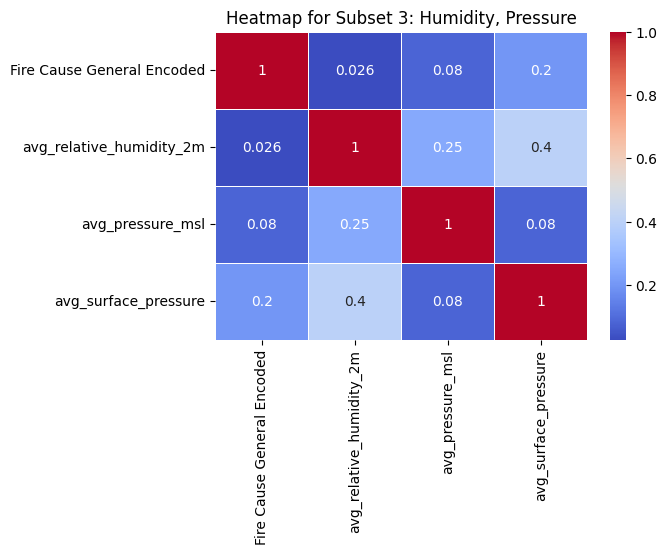

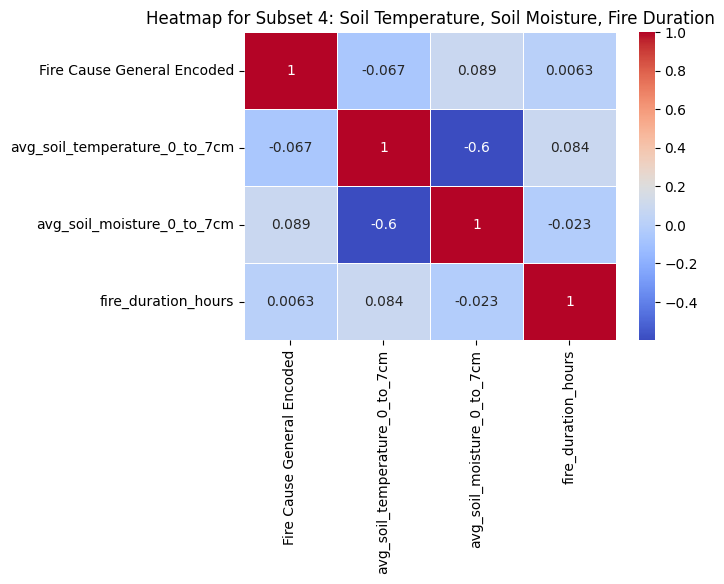

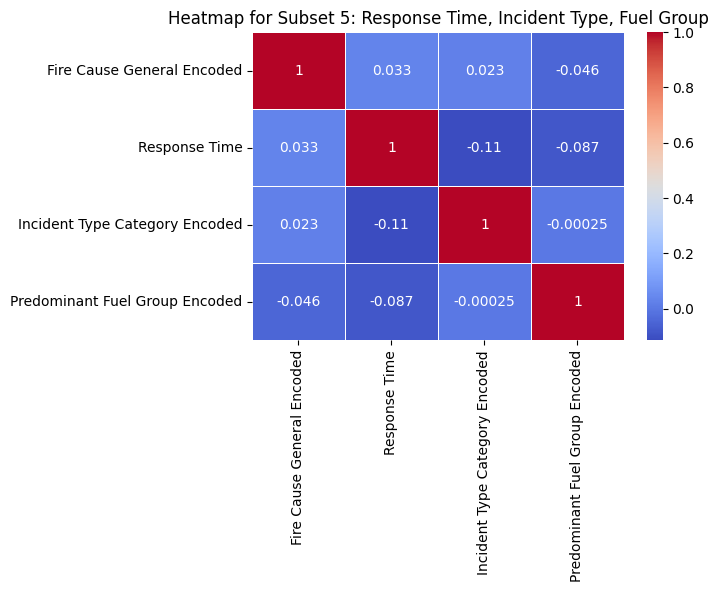

In [86]:

columns_subset_1 = ['Fire Cause General Encoded', 'avg_temperature_2m_max', 'avg_precipitation_sum', 'Incident Size']
columns_subset_2 = ['Fire Cause General Encoded', 'avg_snowfall_sum', 'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max']
columns_subset_3 = ['Fire Cause General Encoded', 'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure']
columns_subset_4 = ['Fire Cause General Encoded', 'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm', 'fire_duration_hours']
columns_subset_5 = ['Fire Cause General Encoded', 'Response Time', 'Incident Type Category Encoded', 'Predominant Fuel Group Encoded']


def plot_heatmap(df, columns, title):
    subset = df[columns]
    correlation_matrix = subset.corr()
    plt.figure(figsize=(6,4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

plot_heatmap(new_data, columns_subset_1, 'Heatmap for Subset 1: Fire Cause, Temperature, Precipitation, and Incident Size')
plot_heatmap(new_data, columns_subset_2, 'Heatmap for Subset 2: Snowfall, Wind Speed, Wind Gusts')
plot_heatmap(new_data, columns_subset_3, 'Heatmap for Subset 3: Humidity, Pressure')
plot_heatmap(new_data, columns_subset_4, 'Heatmap for Subset 4: Soil Temperature, Soil Moisture, Fire Duration')
plot_heatmap(new_data, columns_subset_5, 'Heatmap for Subset 5: Response Time, Incident Type, Fuel Group')


Response related to 'Incident Size'

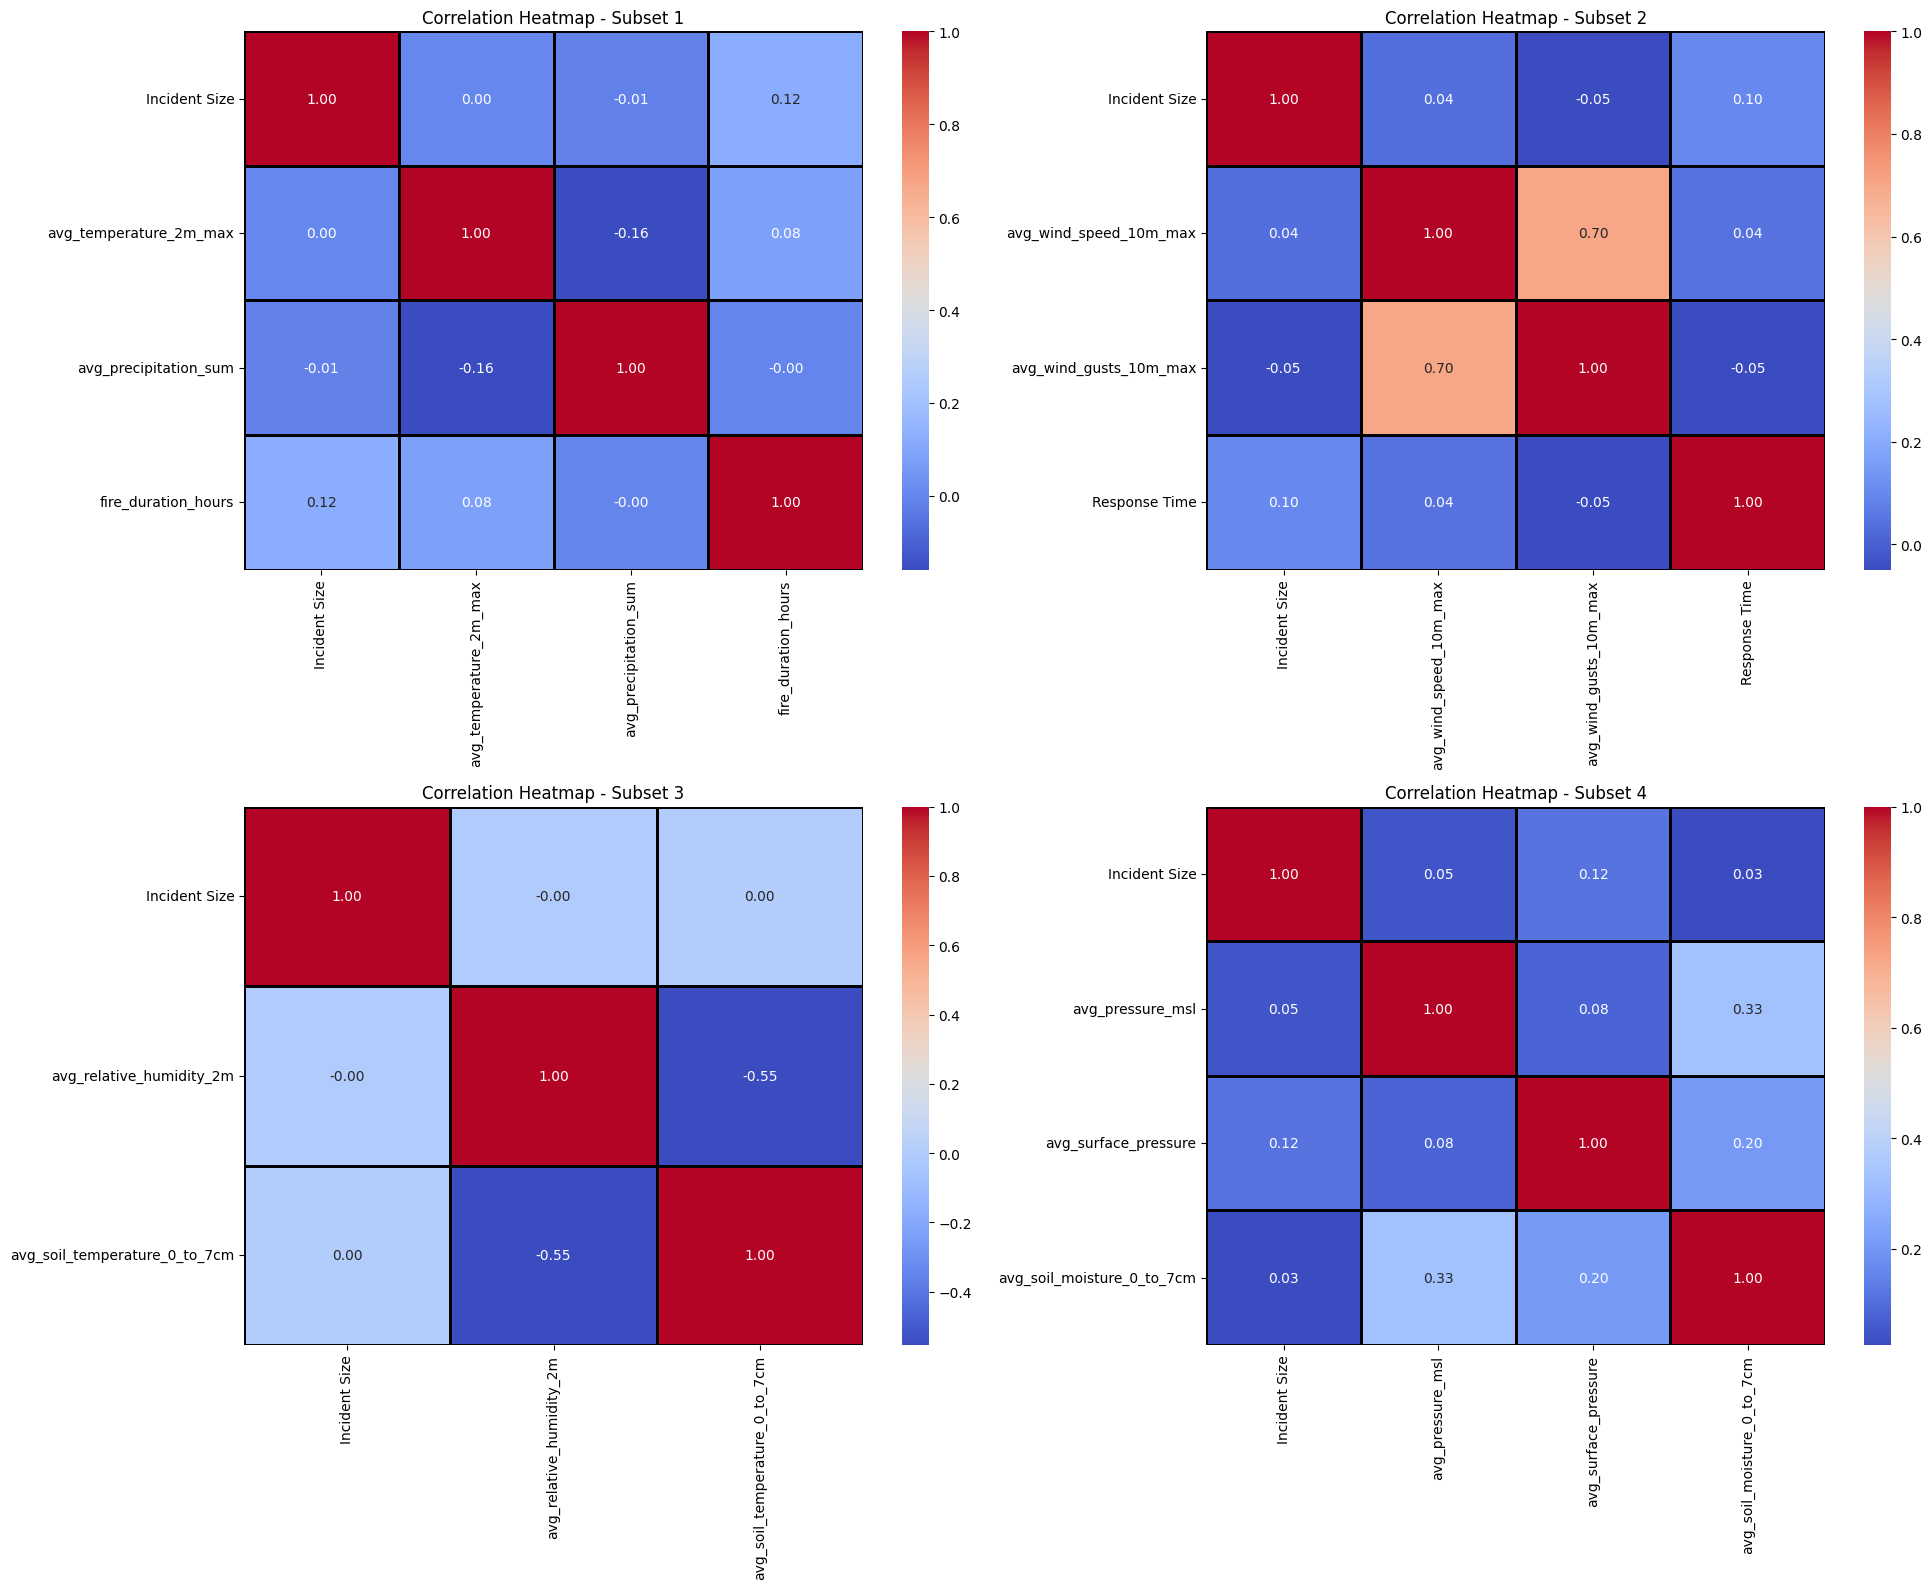

In [87]:

columns_subset_1 = ['Incident Size', 'avg_temperature_2m_max', 'avg_precipitation_sum', 'fire_duration_hours']
columns_subset_2 = ['Incident Size', 'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max', 'Response Time']
columns_subset_3 = ['Incident Size', 'avg_relative_humidity_2m', 'avg_soil_temperature_0_to_7cm']
columns_subset_4 = ['Incident Size', 'avg_pressure_msl', 'avg_surface_pressure', 'avg_soil_moisture_0_to_7cm']


corr_subset_1 = model_data[columns_subset_1].corr()
corr_subset_2 = model_data[columns_subset_2].corr()
corr_subset_3 = model_data[columns_subset_3].corr()
corr_subset_4 = model_data[columns_subset_4].corr()
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sns.heatmap(corr_subset_1, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap - Subset 1')


plt.subplot(2, 2, 2)
sns.heatmap(corr_subset_2, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap - Subset 2')


plt.subplot(2, 2, 3)
sns.heatmap(corr_subset_3, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap - Subset 3')


plt.subplot(2, 2, 4)
sns.heatmap(corr_subset_4, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap - Subset 4')

plt.tight_layout()
plt.show()


In [88]:
model_data.columns

Index(['Incident Size', 'Incident Type Category', 'Predominant Fuel Group',
       'Fire Cause General', 'avg_temperature_2m_max', 'avg_precipitation_sum',
       'avg_snowfall_sum', 'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max',
       'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure',
       'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm',
       'fire_duration_hours', 'Response Time'],
      dtype='object')

In [89]:
model_data = model_data[model_data['fire_duration_hours'] > 0]

model_data = model_data[model_data['Response Time'] > 0]


In [90]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8473 entries, 0 to 11152
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Incident Size                  8472 non-null   float64
 1   Incident Type Category         8473 non-null   object 
 2   Predominant Fuel Group         8473 non-null   object 
 3   Fire Cause General             8473 non-null   object 
 4   avg_temperature_2m_max         8473 non-null   float64
 5   avg_precipitation_sum          8473 non-null   float64
 6   avg_snowfall_sum               8473 non-null   float64
 7   avg_wind_speed_10m_max         8473 non-null   float64
 8   avg_wind_gusts_10m_max         8473 non-null   float64
 9   avg_relative_humidity_2m       8473 non-null   float64
 10  avg_pressure_msl               8473 non-null   float64
 11  avg_surface_pressure           8473 non-null   float64
 12  avg_soil_temperature_0_to_7cm  8473 non-null   float

In [91]:
numerical_cols_m = model_data.select_dtypes(include=['number']).columns
numerical_cols_m
standard_scaler = StandardScaler()
model_data[numerical_cols_m] = standard_scaler.fit_transform(model_data[numerical_cols_m])


In [97]:
new_model_data = fire_weather_data[['Incident Size', 'Incident Type Category', 'Predominant Fuel Group',
       'Fire Cause General', 'avg_temperature_2m_max', 'avg_precipitation_sum',
       'avg_snowfall_sum', 'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max',
       'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure',
       'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm',
       'fire_duration_hours', 'Response Time', 'AcresBLM', 'AcresBOR', 'AcresDOD', 'AcresDOE', 'AcresNPS',
       'AcresUSFS', 'AcresUSFWS', 'AcresTribal', 'AcresCity', 'AcresCounty',
       'AcresState', 'AcresPrivate', 'AcresANCSA', 'AcresOtherLocal', 'AcresOtherFederal']]


In [98]:
new_model_data = new_model_data[new_model_data['fire_duration_hours'] > 0]

new_model_data = new_model_data[new_model_data['Response Time'] > 0]


In [99]:
columns_to_process=['fire_duration_hours','Response Time','Incident Size']

In [100]:
new_model_data = handle_outliers_in_columns(new_model_data, columns_to_process)


In [101]:
new_model_data

,Incident Size,Incident Type Category,Predominant Fuel Group,Fire Cause General,avg_temperature_2m_max,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,fire_duration_hours,Response Time,AcresBLM,AcresBOR,AcresDOD,AcresDOE,AcresNPS,AcresUSFS,AcresUSFWS,AcresTribal,AcresCity,AcresCounty,AcresState,AcresPrivate,AcresANCSA,AcresOtherLocal,AcresOtherFederal
0,0.25,WildFire,Grass,Incendiary (unlawful),1.15,1.15,0.805,30.00,52.05,67.062500,1019.931250,942.775000,-3.666667,0.371271,0.778611,0.061944,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,WildFire,Grass-Shrub,Unknown,35.95,0.00,0.000,15.80,36.90,14.916667,1014.202083,924.197917,27.416667,0.235000,37.300000,0.616667,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,WildFire,Grass-Shrub,Unknown,31.50,0.05,0.000,27.25,52.55,15.979167,1014.312500,810.679167,30.250000,0.078000,241.404444,0.371111,0.0,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.10,WildFire,Grass-Shrub,Natural,25.25,0.05,0.000,18.60,53.10,35.770833,1010.808333,865.397917,20.452083,0.141250,28.805278,2.971944,0.0,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,WildFire,Timber,Natural,26.70,0.40,0.000,15.75,52.00,54.312500,1009.641667,860.081250,19.412500,0.166042,80.250556,0.950556,0.0,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,0.20,WildFire,Grass-Shrub,Natural,22.80,0.65,0.000,16.35,32.40,50.354167,1014.370833,980.891667,20.100000,0.098792,72.694722,2.700000,215.9,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11148,0.20,WildFire,Brush,Natural,31.80,13.85,0.000,14.35,29.15,82.958333,1019.160417,1018.660417,27.508333,0.246812,72.694722,0.066667,0.0,0.0,0.0,0.0,12.56,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11150,0.10,WildFire,Timber,Natural,21.40,4.00,0.000,12.60,34.75,64.312500,1018.906250,756.318750,13.762500,0.283438,50.001944,1.685278,0.0,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11151,0.10,WildFire,Grass,Equipment/vehicles,21.50,7.10,0.000,11.50,38.35,61.583333,1017.116667,773.743750,16.447917,0.434500,193.205278,0.121944,0.0,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
numerical_cols = new_model_data.select_dtypes(include=['number']).columns
numerical_cols
standard_scaler = StandardScaler()
new_model_data[numerical_cols] = standard_scaler.fit_transform(new_model_data[numerical_cols])


In [103]:
new_encoded_data = pd.get_dummies(new_model_data, columns=['Incident Type Category', 'Predominant Fuel Group', 'Fire Cause General'])


In [104]:
new_encoded_data['fire_duration_hours'] = new_encoded_data['fire_duration_hours'].fillna(new_encoded_data['fire_duration_hours'].median())


In [105]:
new_encoded_data = new_encoded_data.dropna(subset=['Incident Size'])


In [106]:
new_encoded_data.isna().sum()


,0
Incident Size,0
avg_temperature_2m_max,0
avg_precipitation_sum,0
avg_snowfall_sum,0
avg_wind_speed_10m_max,0
avg_wind_gusts_10m_max,0
avg_relative_humidity_2m,0
avg_pressure_msl,0
avg_surface_pressure,0
avg_soil_temperature_0_to_7cm,0


In [128]:

X = new_encoded_data.drop(columns = ['Incident Size'], axis=1)
y = new_encoded_data['Incident Size']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.18824920370575665
Mean Squared Error: 0.2906582206614317
Root Mean Squared Error: 0.539127276866448
R-squared: 0.6821944365050872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
def get_season_us(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


In [109]:
fire_weather_data.columns

Index(['OBJECTID', 'Containment Date Time', 'Control Date Time',
       'Incident Size', 'Dispatch Center ID', 'Fire Discovery Date Time',
       'FireOutDateTime', 'GACC', 'Incident Type Category',
       'Incident Type Kind', 'Initial Latitude', 'Initial Longitude',
       'Initial Response Date Time', 'Local Incident Identifier', 'POO County',
       'POODispatchCenterID', 'POO Jurisdictional Agency',
       'POO Jurisdictional Unit', 'POO Landowner Category',
       'POO Landowner Kind', 'POO Protecting Agency', 'POO Protecting Unit',
       'POO State', 'Predominant Fuel Group', 'UniqueFireIdentifier', 'FORID',
       'Fire Cause General', 'GlobalID', 'Related Irwin IDs', 'AcresBIA',
       'AcresBLM', 'AcresBOR', 'AcresDOD', 'AcresDOE', 'AcresNPS', 'AcresUSFS',
       'AcresUSFWS', 'AcresForeign', 'AcresTribal', 'AcresCity', 'AcresCounty',
       'AcresState', 'AcresPrivate', 'AcresANCSA', 'AcresOtherLocal',
       'AcresOtherFederal', 'Calendar Year', 'x', 'y', 'fire_date', 'lat

In [110]:
rem_columns=[
       'Incident Size', 'Fire Discovery Date Time', 'GACC', 'Incident Type Category',
       'Initial Latitude', 'Initial Longitude',
       'POO Landowner Kind', 'Predominant Fuel Group',
       'Fire Cause General', 'AcresBIA',
       'AcresBLM', 'AcresBOR', 'AcresDOD', 'AcresDOE', 'AcresNPS', 'AcresUSFS',
       'AcresUSFWS', 'AcresForeign', 'AcresTribal', 'AcresCity', 'AcresCounty',
       'AcresState', 'AcresPrivate', 'AcresANCSA', 'AcresOtherLocal',
       'AcresOtherFederal', 'avg_temperature_2m_max', 'avg_precipitation_sum', 'avg_snowfall_sum',
       'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max',
       'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure',
       'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm',
       'fire_duration_hours']
rem_data=fire_weather_data[rem_columns]
rem_data

,Incident Size,Fire Discovery Date Time,GACC,Incident Type Category,Initial Latitude,Initial Longitude,POO Landowner Kind,Predominant Fuel Group,Fire Cause General,AcresBIA,AcresBLM,AcresBOR,AcresDOD,AcresDOE,AcresNPS,AcresUSFS,AcresUSFWS,AcresForeign,AcresTribal,AcresCity,AcresCounty,AcresState,AcresPrivate,AcresANCSA,AcresOtherLocal,AcresOtherFederal,avg_temperature_2m_max,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,fire_duration_hours
0,0.25,2020-02-11 16:13:17,NRCC,WildFire,48.11125,-102.826444,Federal,Grass,Incendiary (unlawful),0.0,0.00,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.15,1.15,0.805,30.00,52.05,67.062500,1019.931250,942.775000,-3.666667,0.371271,0.778611
1,1.00,2020-10-14 05:01:00,SWCC,WildFire,33.35797,-110.459900,Federal,Grass-Shrub,Unknown,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.95,0.00,0.000,15.80,36.90,14.916667,1014.202083,924.197917,27.416667,0.235000,37.300000
2,0.10,2020-08-10 13:35:44,SWCC,WildFire,35.42485,-111.568400,Federal,Grass-Shrub,Unknown,0.0,0.00,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.50,0.05,0.000,27.25,52.55,15.979167,1014.312500,810.679167,30.250000,0.078000,241.404444
3,0.10,2020-08-20 17:01:41,NWCC,WildFire,46.25674,-117.467500,Federal,Grass-Shrub,Natural,0.0,0.00,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.25,0.05,0.000,18.60,53.10,35.770833,1010.808333,865.397917,20.452083,0.141250,28.805278
4,0.25,2020-08-06 14:11:58,NRCC,WildFire,46.70312,-113.682500,Federal,Timber,Natural,0.0,0.00,0.0,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.70,0.40,0.000,15.75,52.00,54.312500,1009.641667,860.081250,19.412500,0.166042,80.250556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,13.00,2022-06-20 16:06:00,SACC,WildFire,26.18945,-80.931000,Federal,Brush,Natural,0.0,0.00,0.0,0.0,0.0,12.56,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.80,13.85,0.000,14.35,29.15,82.958333,1019.160417,1018.660417,27.508333,0.246812,1013.400000
11149,30361.00,2022-06-20 15:49:00,AICC,WildFire,66.17999,-150.639300,Federal,Grass,Natural,0.0,30361.01,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.50,0.25,0.000,12.40,33.45,61.916667,1014.912500,951.983333,13.895833,0.238083,2712.183333
11150,0.10,2022-06-20 15:45:53,SWCC,WildFire,33.79874,-109.114900,Federal,Timber,Natural,0.0,0.00,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.40,4.00,0.000,12.60,34.75,64.312500,1018.906250,756.318750,13.762500,0.283438,50.001944
11151,0.10,2022-06-20 14:52:41,SWCC,WildFire,31.79724,-109.282500,Federal,Grass,Equipment/vehicles,0.0,0.00,0.0,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.50,7.10,0.000,11.50,38.35,61.583333,1017.116667,773.743750,16.447917,0.434500,193.205278


In [111]:
rem_data['Fire Discovery Date Time'] = pd.to_datetime(rem_data['Fire Discovery Date Time'])


<ipython-input-111-9c7bc76944a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['Fire Discovery Date Time'] = pd.to_datetime(rem_data['Fire Discovery Date Time'])


In [112]:
rem_data['season'] = rem_data['Fire Discovery Date Time'].apply(get_season_us)

<ipython-input-112-83f675dcb7d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['season'] = rem_data['Fire Discovery Date Time'].apply(get_season_us)


In [113]:
rem_data.drop(columns=['Fire Discovery Date Time'], inplace=True)


<ipython-input-113-4df8f2ffa319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data.drop(columns=['Fire Discovery Date Time'], inplace=True)


In [114]:
rem_data = rem_data[rem_data['fire_duration_hours'] > 0]


In [115]:
columns_to_process=['fire_duration_hours','Incident Size']
new_model_data = handle_outliers_in_columns(new_model_data, columns_to_process)


In [116]:
numerical_columns = ['Incident Size',  'AcresBIA', 'AcresBLM', 'AcresBOR', 'AcresDOD',
       'AcresDOE', 'AcresNPS', 'AcresUSFS', 'AcresUSFWS', 'AcresForeign',
       'AcresTribal', 'AcresCity', 'AcresCounty', 'AcresState', 'AcresPrivate',
       'AcresANCSA', 'AcresOtherLocal', 'AcresOtherFederal',
       'avg_temperature_2m_max', 'avg_precipitation_sum', 'avg_snowfall_sum',
       'avg_wind_speed_10m_max', 'avg_wind_gusts_10m_max',
       'avg_relative_humidity_2m', 'avg_pressure_msl', 'avg_surface_pressure',
       'avg_soil_temperature_0_to_7cm', 'avg_soil_moisture_0_to_7cm',
       'fire_duration_hours']
categorical_columns = ['season', 'GACC', 'Incident Type Category', 'POO Landowner Kind', 'Predominant Fuel Group',
       'Fire Cause General']

scaler = StandardScaler()
label_encoder = LabelEncoder()

rem_data[numerical_columns] = scaler.fit_transform(rem_data[numerical_columns])

for col in categorical_columns:
    rem_data[col] = label_encoder.fit_transform(rem_data[col])

rem_data


<ipython-input-116-314febe34d53>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data[numerical_columns] = scaler.fit_transform(rem_data[numerical_columns])
<ipython-input-116-314febe34d53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data[col] = label_encoder.fit_transform(rem_data[col])
<ipython-input-116-314febe34d53>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Incident Size,GACC,Incident Type Category,Initial Latitude,Initial Longitude,POO Landowner Kind,Predominant Fuel Group,Fire Cause General,AcresBIA,AcresBLM,AcresBOR,AcresDOD,AcresDOE,AcresNPS,AcresUSFS,AcresUSFWS,AcresForeign,AcresTribal,AcresCity,AcresCounty,AcresState,AcresPrivate,AcresANCSA,AcresOtherLocal,AcresOtherFederal,avg_temperature_2m_max,avg_precipitation_sum,avg_snowfall_sum,avg_wind_speed_10m_max,avg_wind_gusts_10m_max,avg_relative_humidity_2m,avg_pressure_msl,avg_surface_pressure,avg_soil_temperature_0_to_7cm,avg_soil_moisture_0_to_7cm,fire_duration_hours,season
0,-0.065856,4,1,48.11125,-102.826444,1,1,4,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033461,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,-2.682352,0.107141,2.184492,1.725019,0.502035,1.164135,0.956102,0.708435,-2.282798,1.491831,-0.377446,3
1,-0.065777,10,1,33.35797,-110.459900,1,2,12,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033503,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,1.473581,-0.350858,-0.118511,-0.467760,-0.697110,-1.531856,-0.081488,0.479956,1.059881,0.364095,-0.323655,0
2,-0.065872,10,1,35.42485,-111.568400,1,2,12,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033486,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,0.942147,-0.330945,-0.118511,1.300361,0.541611,-1.476924,-0.061491,-0.916208,1.364575,-0.935190,-0.023038,2
3,-0.065872,5,1,46.25674,-117.467500,1,2,6,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033486,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,0.195751,-0.330945,-0.118511,-0.035381,0.585144,-0.453675,-0.696118,-0.243223,0.310915,-0.411752,-0.336167,2
4,-0.065856,4,1,46.70312,-113.682500,1,5,6,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033461,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,0.368915,-0.191554,-0.118511,-0.475482,0.498077,0.504947,-0.907409,-0.308613,0.199119,-0.206584,-0.260395,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,-0.064505,9,1,26.18945,-80.931000,1,0,6,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.007856,-0.033503,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,0.977974,5.165047,-0.118511,-0.691671,-1.310534,1.985965,0.816499,1.641748,1.069738,0.461851,1.114003,2
11149,3.152269,0,1,66.17999,-150.639300,1,1,6,-0.015394,10.909110,-0.011769,-0.014714,-0.014204,-0.023044,-0.033503,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,-0.490933,-0.251293,-0.118511,-0.992792,-0.970183,0.898090,0.047173,0.821688,-0.394140,0.389611,3.616072,2
11150,-0.065872,10,1,33.79874,-109.114900,1,5,6,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033486,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,-0.264029,1.242183,-0.118511,-0.961908,-0.867286,1.021957,0.770467,-1.584785,-0.408478,0.764949,-0.304947,2
11151,-0.065872,10,1,31.79724,-109.282500,1,1,1,-0.015394,-0.038652,-0.011769,-0.014714,-0.014204,-0.023044,-0.033486,-0.021062,0.0,-0.014979,-0.014152,-0.012372,-0.039786,-0.028662,-0.014405,-0.015097,-0.010679,-0.252086,2.476790,-0.118511,-1.131771,-0.582340,0.880857,0.446362,-1.370476,-0.119690,2.015097,-0.094029,2


In [117]:
rem_data.dropna(inplace=True)

<ipython-input-117-4dd65501ce36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data.dropna(inplace=True)


In [118]:
rem_data.isna().sum()

,0
Incident Size,0
GACC,0
Incident Type Category,0
Initial Latitude,0
Initial Longitude,0
POO Landowner Kind,0
Predominant Fuel Group,0
Fire Cause General,0
AcresBIA,0
AcresBLM,0


In [119]:
X = rem_data.drop(columns=['Fire Cause General'])
y = rem_data['Fire Cause General']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy = rf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

                                precision    recall  f1-score   support

           Debris/open burning       0.68      0.29      0.41        65
            Equipment/vehicles       0.42      0.23      0.30       304
             Fire Play (minor)       1.00      0.11      0.20        18
                     Fireworks       1.00      0.04      0.08        24
         Incendiary (unlawful)       0.64      0.19      0.29        86
           Miscellaneous/other       0.57      0.62      0.60       435
                       Natural       0.65      0.88      0.75       690
 Power generation/transmission       1.00      0.20      0.33        10
                      Railroad       0.75      0.26      0.39        34
Recreation/cultural activities       0.38      0.19      0.25       218
                       Smoking       0.49      0.46      0.47       330
                     Structure       0.60      0.14      0.22        22
                       Unknown       0.49      0.61      0.55  

# Visualizations

#### 1. Density plot for wildfires during each quarter of the year in the United States during 2018 to observe patterns in fires seasonally and geographically. Our hypothesis is that wildfires are most frequent in the third quarter of the year due to high temperatures all across the country. Additionally, we expect high density of wildfires around the West coast as opposed to the East coast, perhaps due to the West becoming significantly drier during the summer (third quarter) months in combination with much of the vegetation being dry and flammable in those regions. This allows us to potentially bring in Fire Cause General and Specific as features in a future wildfire analyses.

In [132]:
import geopandas as gpd

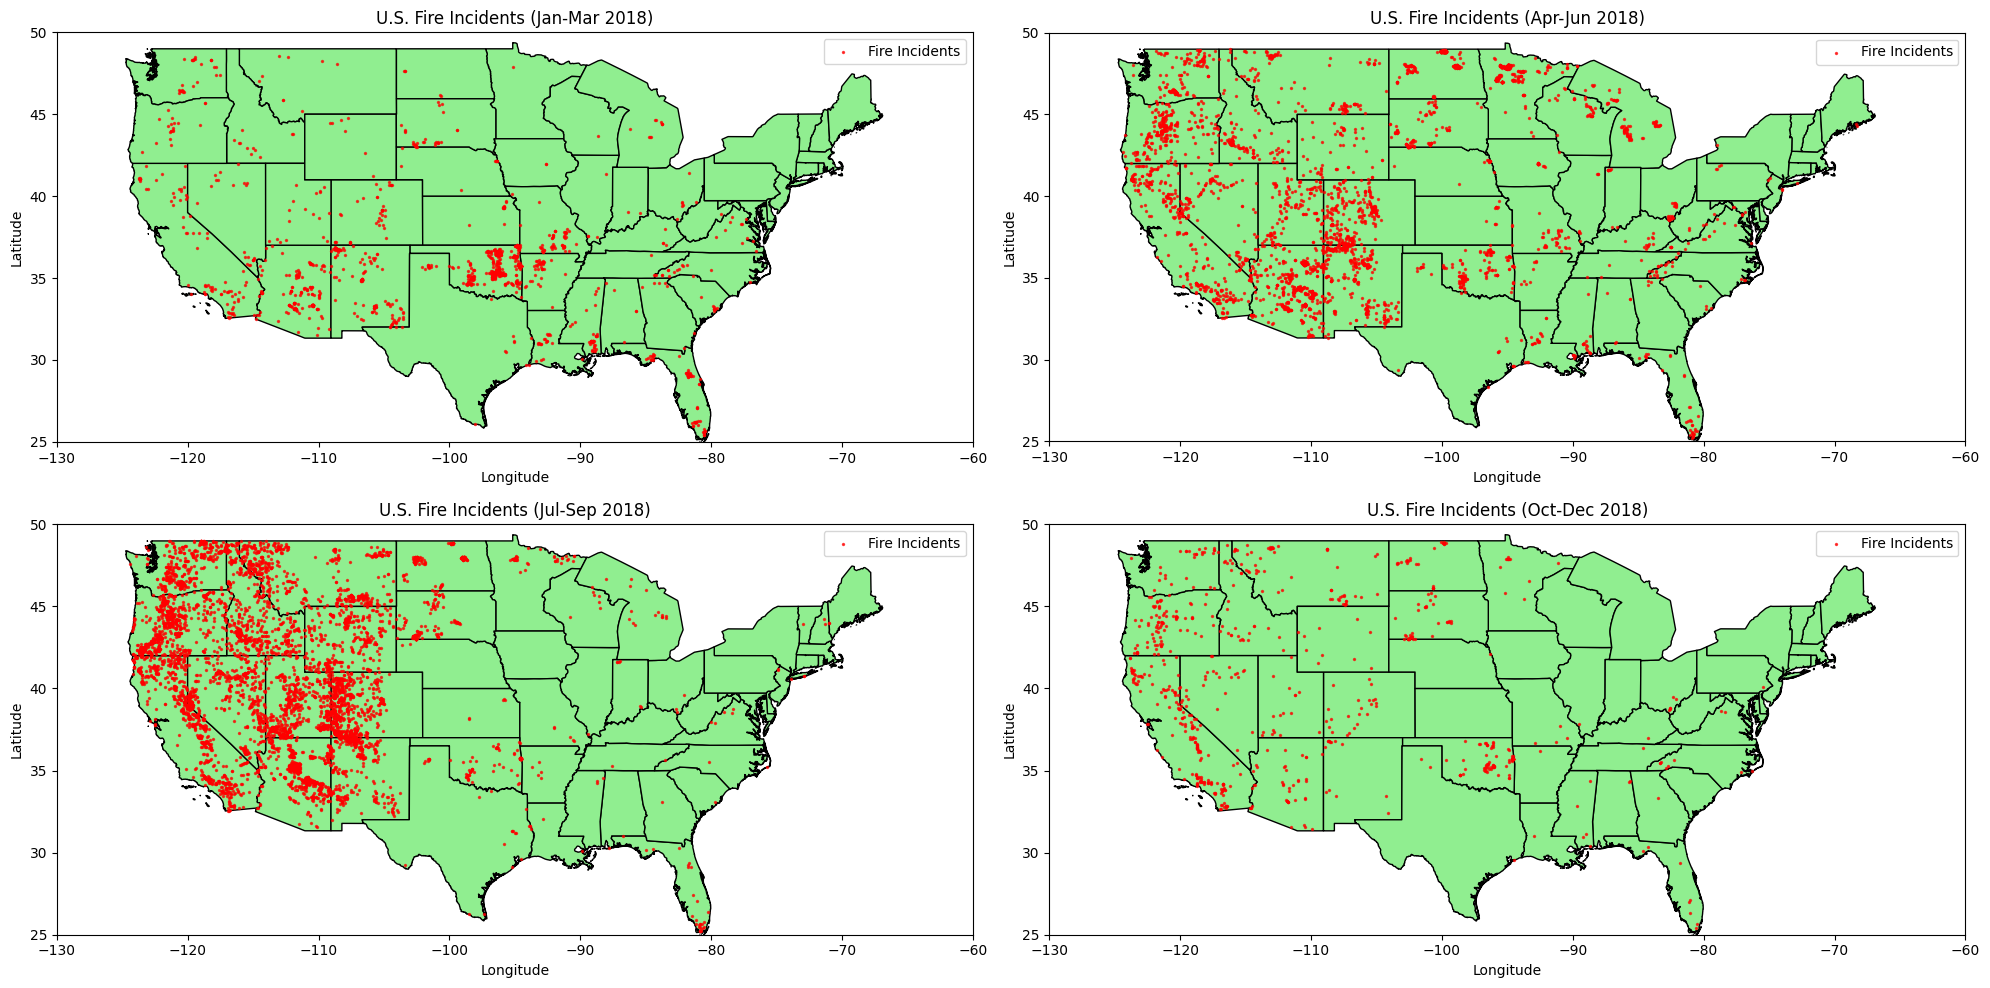

In [135]:

# preprocessing - which involved  further reducing the data set for this purpose
def preprocessing(inform):

    inform['Fire Discovery Date Time'] = pd.to_datetime(inform['Fire Discovery Date Time'])
    inform = inform[inform['Fire Discovery Date Time'].dt.year == 2018]
    inform = inform.dropna(subset=['Initial Latitude', 'Initial Longitude'])
    # datetime module contains quarter (3 months per quarter)
    inform['Quarter'] = inform['Fire Discovery Date Time'].dt.quarter

    # converting to GeoDataFrame and set the CRS to WGS 84 (EPSG:4326) which sets
    # the coordinate reference system to the U.S
    gdf = gpd.GeoDataFrame(inform,
        geometry=gpd.points_from_xy(inform['Initial Longitude'], inform['Initial Latitude']),
        crs="EPSG:4326"  # sets CRS lat/longitude
    )

    return gdf # returns a geodataframe

# cropping to the boundaries of the contiguous US since our data encompasses virgin islands, hawaii, alaska, etc.
def crop_to_us_boundary(filtered_gdf, us_boundary):
    # Ensure CRS matches
    filtered_gdf = filtered_gdf.to_crs(us_boundary.crs)

    # Spatial join to retain only points within the U.S. boundary
    cropped_gdf = gpd.sjoin(filtered_gdf, us_boundary, how="inner", predicate="within")
    return cropped_gdf

# plotting
def plot_us_fires_by_quarter(gdf, us_boundary):
    quarters = gdf['Quarter'].unique()
    quarter_names = {1: 'Jan-Mar', 2: 'Apr-Jun', 3: 'Jul-Sep', 4: 'Oct-Dec'} # splits the year into quarters

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes = axes.flatten() # PLEASE DONT DELETE THIS LINE, REQUIRED FOR MAP AND POINTS TO SHOW

    for idx, quarter in enumerate(sorted(quarters)):
        ax = axes[idx]
        quarter_gdf = gdf[gdf['Quarter'] == quarter]

        # makes the united states green or whatever color you'd like!
        us_boundary.plot(ax=ax, color='lightgreen', edgecolor='black')

        # fire incidepnce plotting (each incident is one point)
        quarter_gdf.plot(
            ax=ax,
            alpha=0.7, # transparency since points overlap a lot & it makes it easier to see density
            color='red',
            markersize=2,  # fire point size
            label='Fire Incidents')

        ax.set_title(f"U.S. Fire Incidents ({quarter_names.get(quarter, 'Q'+str(quarter))} 2018)")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        ax.legend()
        ax.set_xlim(-130, -60)
        ax.set_ylim(25, 50)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    file_name = "transformed.csv" # wildfire dataset
    #map_path = r"c:\Users\Linda\OneDrive - University of Illinois Chicago\CS 418\FinalProject\map\ne_json.geojson" # contains the U.S map in the form of a geogjson file
    map_path = "/content/drive/MyDrive/WildFirePrediction/map/ne_json.geojson" # contains the U.S map in the form of a geogjson file if on colab

    usa = gpd.read_file(map_path) # reads geojson map file
    contiguous_us = usa[usa['ISO3166-1-Alpha-3'] == 'USA']  # this makes sure we only have the USA map, not Canada & Mexico which is included in the map file

    # Crop to contiguous U.S.
    minx, miny, maxx, maxy = -130, 20, -60, 55  # contiguous United States latitute and longitude bounds
    contiguous_us = contiguous_us.cx[minx:maxx, miny:maxy]


    filtered_gdf = preprocessing(inform) # preprocessing data into a geodataframe to use for mapping

    # Ensure CRS is set and consistent
    if contiguous_us.crs is None:
        contiguous_us.set_crs(epsg=4326, inplace=True)
    filtered_gdf = crop_to_us_boundary(filtered_gdf, contiguous_us)

    # Plot the data by quarter
    plot_us_fires_by_quarter(filtered_gdf, contiguous_us)


#### 2. This visualization is a bar plot that represents the distribution of response time to wildfires. This is incredibly important in wildfire management, as identifying these patterns can help to pinpoint where agencies may need to allocate more resources. This in turn may save lives, property, ecosysytems, and be a preventative measure for major financial loss due to fires. Our hypothesis is that the majority of wildfires are responded to within one to three hours, since that seems like the realistic timeframe of the start of a fire to its detection to it being put out, if it is in the range of a small to mid-size fire. We make these predictions from the assumption that the majority of wildfires are small and containable. Our hypothesis was not entirely supported when we completed this visualization, and were pleasantly surprised to find that the majority of wildfires are dealt with in under one hour.

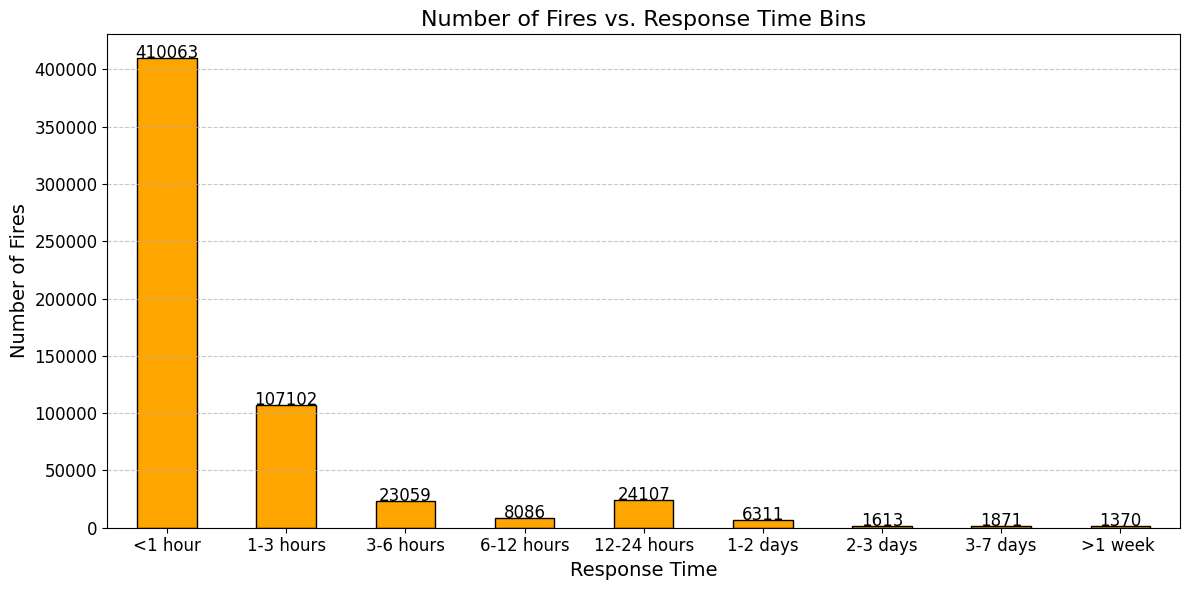

In [136]:
inform['Response Time'] = (inform['Initial Response Date Time'] - inform['Fire Discovery Date Time']).dt.total_seconds() / 3600.0


# drop rows with no response time
inform = inform.dropna(subset=['Response Time'])
inform = inform[inform['Response Time'] >= 0]

# bins will hold a range of time (0 will hold 0 minutes to 59 minutes, 1 will hold 60 minutes to 179 minutes and so on
bins = [0, 1, 3, 6, 12, 24, 48, 72, 168, float('inf')]  # minimum bin in hours, also infinity has to be float or code wont run
labels = ['<1 hour', '1-3 hours', '3-6 hours', '6-12 hours', '12-24 hours', '1-2 days', '2-3 days', '3-7 days', '>1 week ']

# assign bins to 'Response Time'
inform['Response Time Bin'] = pd.cut(inform['Response Time'], bins=bins, labels=labels, right=False)

# number of fires per time range
response_time_counts = inform['Response Time Bin'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = response_time_counts.plot(kind='bar', color='orange', edgecolor='black')
for index, value in enumerate(response_time_counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12, color='black')

plt.title('Number of Fires vs. Response Time Bins', fontsize=16)
plt.xlabel('Response Time', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Reflection
### 1. What is the hardest part of the project that you’ve encountered so far?
We started off with a dataset of  900,000 instances, which looked promising. However, after preprocessing, we found that multiple columns were filled with more than 90% NaN values, which reduced the dataset to 300,000 instances after dropping them. After that, we had to integrate the dataset with the weather data which we were fetching from Open Meteo API which has a daily limit of 10,000 calls and took more than 2.5 hours for 5000 requests. So, overall, we were left with merely 11,000 instances of data from 900,000.
Additionally, while doing the modeling, it was also observed that the correlation between the variables is low which led to the model accuracy not being at par with what was expected.
### 2. What are your initial insights?
We found that the Incident size has a good correlation with fire cause specific
### 3. Are there any concrete results you can show at this point? If not, why not?
Yes, the accuracy of the Random Forest model came up to 55% while predicting cause of fire, with other fields

### 4.  Going forward, what are the current biggest problems you’re facing?
We are facing problems finding an adequate data set with a good correlation between variables.
### 5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Not quite, we need to dedicate more time to exploring the right data set. Currently the dataset we have has challenges pertaining to multicollinearity, missing values and the time taken for fetching data from APIs.
### 6. Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
Yes, it is worth proceeding with the project. We need to find a better approach for finding the data. We plan to mine for more datasets with appropriate metadata and documentation describing the data. Apart from that, we also plan to perform feature transformation of the current dataset so that we can get derived features that have more informative variables with better correlation.


# Next Steps:
### What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it?
Our plan for the next month is to have a comprehensive dataset which meets the quality standards for modeling. It will involve finishing the integration of different features, handling missing values and removing irrelevant columns. We also plan to have multiple visualizations showcasing the different relationships and trends in data like the patterns of weather conditions on days when wildfires are observed or fuel types vs fire intensity.